This Mathematica code is *Introduction to Computational Quantum Mechanics*  by Roman Schmied. 

You can download the associated lecture script at  [http://arxiv.org/abs/1403.7050](http://arxiv.org/abs/1403.7050) 

# many ways to define the factorial function

The following list of definitions of the factorial function is based on the Wolfram demo  [http://www.wolfram.com/training/videos/EDU002/](http://www.wolfram.com/training/videos/EDU002/) . Try to understand as many of these definitions as possible. What this means in practice is that for most problems you can pick the programming paradigm that suits your way of thinking best, instead of being forced into one way or another. The different paradigms have different advantages and disadvantages, which may become clearer to you as you become more familiar with them.

### ---UNPARSED---. function identity

Define the function  $f$ 



 to be an alias of the built-in function  $\text{Factorial}$ 



:  $f[5]$ 



 is now strictly the same thing as calling  $\text{Factorial}[5]$ 



, which in turn is the same thing as calling  $5!$ 



.

In [1]:
Clear[f]; 
f = Factorial; 

### ---UNPARSED---. function forwarding

A call to  $f$ 



 is forwarded to the function “ `!` ”: calling  $f[5]$ 



 triggers the evaluation of  $5!$ 



.

In [3]:
Clear[f]; 
f[n_] := n!

### ---UNPARSED---. mathematical equivalence (I)

Use the mathematical definition  $n\text{!=}\Gamma (n+1)$ 



:

In [5]:
Clear[f]; 
f[n_] := Gamma[n + 1]

### ---UNPARSED---. mathematical equivalence (II)

Use the mathematical definition  $n\text{!=}\prod _{i=1}^n$ 



:

In [7]:
Clear[f]; 
f[n_] := Product[i, {i, n}]

### ---UNPARSED---. recursion (I): pattern matching

Rule-based recursion, using Mathematica’s built-in pattern-matching capabilities: calling  $f[5]$ 



 leads to a call of  $f[4]$ 



, which leads to a call of  $f[3]$ 



, and so on until  $f[1]$ 



 immediately returns the result  $1$ 



, after which the program unrolls the recursion stack and does the necessary multiplications:

In [9]:
Clear[f]; 
f[1] = 1; 
f[n_] := n*f[n - 1]

### ---UNPARSED---. recursion (II): If clause

The same recursion but without rules (no pattern-matching):

In [12]:
Clear[f]; 
f[n_] := If[n == 1, 1, n*f[n - 1]]

### ---UNPARSED---. recursion (III): anonymous function

Define the same recursion through functional programming:  $f$ 



 is a function whose name is  $\#0$ 



 and whose first (and only) argument is  $\#1$ 



. The end of the function definition is marked with  $\&$ 



.

In [14]:
Clear[f]; 
f = If[#1 == 1, 1, #1*#0[#1 - 1]] & ; 

### ---UNPARSED---. procedural programming (I): Do loop

procedural programming with a  $\text{Do}$ 



 loop:

In [16]:
Clear[f]; 
f[n_] := Module[{t = 1}, Do[t = t*i, {i, n}]; t]

### ---UNPARSED---. procedural programming (II): For loop

procedural programming with a  $\text{For}$ 



 loop: this is how you would compute factorials in procedural programming languages like C. It is a very precise step-by-step prescription of how exactly the computer is supposed to do the calculation.

In [18]:
Clear[f]; 
f[n_] := Module[{t = 1, i}, For[i = 1, i <= n, i++, t *= i]; t]

### ---UNPARSED---. list processing (I): automatic

Make a list of the numbers  $1\ldots n$ 



 (with  $\text{Range}[n]$ 



) and then multiply them together at once, by applying the function  $\text{Times}$ 



 to this list. This is the most elegant way of multiplying all these numbers together, because both the generation of the list of integers and their multiplication are done with internally optimized methods. The programmer merely specifies  *what*  he would like the computer to do, and not  *how*  it is to be done.

In [20]:
Clear[f]; 
f[n_] := Times @@ Range[n]

### ---UNPARSED---. list processing (II): manual

Make a list of the numbers  $1\ldots n$ 



 and then multiply them together one after the other.

In [22]:
Clear[f]; 
f[n_] := Fold[Times, 1, Range[n]]

### ---UNPARSED---. functional programming

Functional programming: make a list of functions  $\{t\to t,t\to 2t,t\to 3t,\ldots ,t\to n t\}$ 



, and then, starting with the number  $1$ 



, apply each of these functions once.

In [24]:
Clear[f]; 
f[n_] := Fold[#2[#1] & , 1, Array[Function[t, #1*t] & , n]]

### ---UNPARSED---. permutation group size

Construct a list whose length we know to be  $n!$ 



:

In [26]:
Clear[f]; 
f[n_] := Length[Permutations[Range[n]]]

### ---UNPARSED---. repeated pattern matching and replacement

Use repeated pattern-based replacement ( $\text{//.}$ 



) to find the factorial: start with the object  $\{1,n\}$ 



 and apply the given rule until the result no longer changes because the pattern no longer matches.

In [28]:
Clear[f]; 
f[n_] := First[{1, n} //. {a_, b_ /; b > 0} :> {b*a, b - 1}]

### ---UNPARSED---. string processing

Build a string whose length is  $n!$ 





In [30]:
Clear[f]; 
f[n_] := StringLength[Fold[StringJoin[Table[#1, {#2}]] & , "A", Range[n]]]

### ---UNPARSED---. nested lists by repeated replacement

Starting from the number  $n$ 



, repeatedly replace each number  $m$ 



 by a list containing  $m$ 



 times the number  $m-1$ 



. At the end, we have a list of lists of ... of lists that overall contains  $n!$ 



 times the number 1. Flatten it out and count the number of elements.

In [32]:
Clear[f]; 
f[n_] := Length[Flatten[n //. m_ /; m > 1 :> Table[m - 1, {m}]]]

### ---UNPARSED---. analytic differentiation

Use the relationship  $\frac{d^n}{dx^n}\left(x^n\right)=n!$ 



: compute the  $n^{\text{th}}$ 



 derivative of  $x^n$ 



.

In [34]:
Clear[f]; 
f[n_] := D[x^n, {x, n}]

This Mathematica code is part of the lecture script  *Introduction to Computational Quantum Mechanics*  by Roman Schmied. It is licensed under a  [Creative Commons Attribution-ShareAlike 4.0 International License](http://creativecommons.org/licenses/by-sa/4.0/) .



You can download the associated lecture script at  [http://arxiv.org/abs/1403.7050](http://arxiv.org/abs/1403.7050) 

# reduced density matrices

We operate in a Hilbert space that is the direct product (tensor product) of three Hilbert subspaces associated with three subsystems A, B, C, which have dimensions  $d_A$ 



,  $d_B$ 



,  $d_C$ 



, respectively. The goal is to calculate the reduced density matrix of the system after tracing out (forgetting, cutting out) subsystem B.

### tripartite cases

#### starting from a density matrix  $\rho _{\text{ABC}}$ 





Given a density matrix  $\rho _{\text{ABC}}$ 



 of size  $d_Ad_Bd_C\times d_Ad_Bd_C$ 



, calculate the reduced density matrix  $\rho _{\text{AC}}$ 



 of size  $d_Ad_C\times d_Ad_C$ 



 after tracing out subsystem B:

In [36]:
rdm[(ρABC_)?MatrixQ, {dA_Integer /; dA >= 1, dB_Integer /; dB >= 1, dC_Integer /; dC >= 1}] /; Dimensions[ρABC] == {dA*dB*dC, dA*dB*dC} := Flatten[TensorContract[ArrayReshape[ρABC, {dA, dB, dC, dA, dB, dC}], {2, 5}], {{1, 2}, {3, 4}}]

#### starting from a pure state  $\psi _{\text{ABC}}$ 





Given a pure state  $\psi _{\text{ABC}}$ 



 of length  $d_Ad_Bd_C$ 



, calculate the reduced density matrix  $\rho _{\text{AC}}$ 



 of size  $d_Ad_C\times d_Ad_C$ 



 after tracing out subsystem B:

In [37]:
rdm[(ψABC_)?VectorQ, {dA_Integer /; dA >= 1, dB_Integer /; dB >= 1, dC_Integer /; dC >= 1}] /; Length[ψABC] == dA*dB*dC := With[{P = ArrayReshape[ψABC, {dA, dB, dC}]}, Flatten[Transpose[P, {1, 3, 2}] . ConjugateTranspose[P], {{1, 2}, {3, 4}}]]

### bipartite cases

 $d>0$ 



: trace out the first  $d$ 



 dimensions

 $d<0$ 



: trace out the last  $d$ 



 dimensions

#### starting from a density matrix  $\rho$ 





Given a density matrix  $\rho$ 



 of size  $d d'\times d d'$ 



, calculate the reduced density matrix  $\tilde{\rho }$ 



 of size  $d'\times d'$ 



 after tracing out the subsystem of dimension  $d$ 



:

In [38]:
traceout[(ρ_)?MatrixQ, d_Integer /; d >= 1] /; Length[ρ] == Length[Transpose[ρ]] && Divisible[Length[ρ], d] := rdm[ρ, {1, d, Length[ρ]/d}]

Given a density matrix  $\rho$ 



 of size  $d'| d| \times d'| d|$ 



, calculate the reduced density matrix  $\tilde{\rho }$ 



 of size  $d'\times d'$ 



 after tracing out the subsystem of dimension  $| d|$ 



:

In [39]:
traceout[(ρ_)?MatrixQ, d_Integer /; d <= -1] /; Length[ρ] == Length[Transpose[ρ]] && Divisible[Length[ρ], -d] := rdm[ρ, {Length[ρ]/(-d), -d, 1}]

#### starting from a pure state  $\psi$ 





Given a pure state  $\psi$ 



 of length  $d d'$ 



, calculate the reduced density matrix  $\tilde{\rho }$ 



 of size  $d'\times d'$ 



 after tracing out the subsystem of dimension  $d$ 



:

In [40]:
traceout[(ψ_)?VectorQ, d_Integer /; d >= 1] /; Divisible[Length[ψ], d] := rdm[ψ, {1, d, Length[ψ]/d}]

Given a pure state  $\psi$ 



 of length  $d'd$ 



, calculate the reduced density matrix  $\tilde{\rho }$ 



 of size  $d'\times d'$ 



 after tracing out the subsystem of dimension  $d$ 



:

In [41]:
traceout[(ψ_)?VectorQ, d_Integer /; d <= -1] /; Divisible[Length[ψ], -d] := rdm[ψ, {Length[ψ]/(-d), -d, 1}]

This Mathematica code is part of the lecture script  *Introduction to Computational Quantum Mechanics*  by Roman Schmied. It is licensed under a  [Creative Commons Attribution-ShareAlike 4.0 International License](http://creativecommons.org/licenses/by-sa/4.0/) .



You can download the associated lecture script at  [http://arxiv.org/abs/1403.7050](http://arxiv.org/abs/1403.7050) 

# quantum-mechanical spin and angular momentum operators

In [42]:
SpinQ[S_] := IntegerQ[2*S] && S >= 0
splus[0] = SparseArray[{{0}}]; 
splus[(S_)?SpinQ] := splus[S] = SparseArray[Band[{1, 2}] -> Table[Sqrt[S*(S + 1) - M*(M + 1)], {M, S - 1, -S, -1}], {2*S + 1, 2*S + 1}]
sminus[(S_)?SpinQ] := Transpose[splus[S]]
sx[(S_)?SpinQ] := sx[S] = (splus[S] + sminus[S])/2
sy[(S_)?SpinQ] := sy[S] = (splus[S] - sminus[S])/(2*I)
sz[(S_)?SpinQ] := sz[S] = SparseArray[Band[{1, 1}] -> Range[S, -S, -1], {2*S + 1, 2*S + 1}]
id[(S_)?SpinQ] := id[S] = IdentityMatrix[2*S + 1, SparseArray]

This Mathematica code is part of the lecture script  *Introduction to Computational Quantum Mechanics*  by Roman Schmied. It is licensed under a  [Creative Commons Attribution-ShareAlike 4.0 International License](http://creativecommons.org/licenses/by-sa/4.0/) .



You can download the associated lecture script at  [http://arxiv.org/abs/1403.7050](http://arxiv.org/abs/1403.7050) 

# spin-1/2 electron in a dc magnetic field

Pauli operators:

In [50]:
{Sx, Sy, Sz} = (1/2)*Table[PauliMatrix[i], {i, 1, 3}]; 

units:

In [51]:
MagneticFieldUnit = Quantity["Gausses"]; 
EnergyUnit = UnitConvert[Quantity["PlanckConstant"]*Quantity["MHz"]]; 

express the Bohr magneton in these units:  $\left.\mu _B\right/h\approx 1.4\text{MHz}/G$ 





In [53]:
μB = UnitConvert[Quantity["BohrMagneton"]/(EnergyUnit/MagneticFieldUnit)]

1.399624492

electron  $g$ 



 factor:

In [54]:
ge = UnitConvert["ElectronGFactor"]

-2.002319304363

Hamiltonian:

Bx   I                    Bx   I
{{1.401247569 Bz, 2.80249514 (-- - - By)}, {2.80249514 (-- + - By), -1.401247569 Bz}}
                              2    2                    2    2
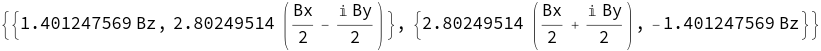

In [55]:
H[Bx_, By_, Bz_] = (-μB)*ge*(Sx*Bx + Sy*By + Sz*Bz)

eigenvalues and non-normalized eigenvectors:

2               2               2
{{-1.00000000 Sqrt[1.9634948 Bx  + 1.9634948 By  + 1.9634948 Bz ], 
 
                      2               2               2
>    Sqrt[1.9634948 Bx  + 1.9634948 By  + 1.9634948 Bz ]}, 
 
>   {{(-0.7136498 (-1.4012476 Bz + 1.0000000 
 
                             2               2               2
>           Sqrt[1.9634948 Bx  + 1.9634948 By  + 1.9634948 Bz ])) / 
 
>      (1.0000000 Bx + (1.0000000 I) By), 1.00000000}, 
 
>    {(0.71364977 (1.40124757 Bz + 1.00000000 
 
                             2               2               2
>           Sqrt[1.9634948 Bx  + 1.9634948 By  + 1.9634948 Bz ])) / 
 
>      (1.00000000 Bx + (1.00000000 I) By), 1.00000000}}}
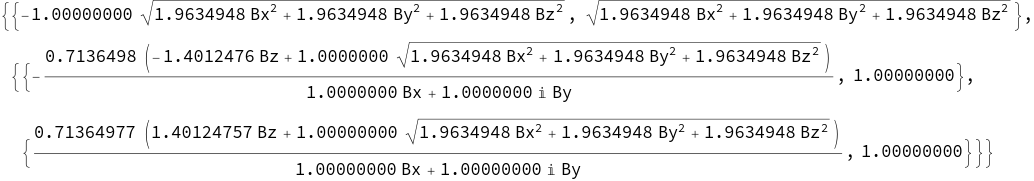

In [56]:
Eigensystem[H[Bx, By, Bz]]

This Mathematica code is part of the lecture script  *Introduction to Computational Quantum Mechanics*  by Roman Schmied. It is licensed under a  [Creative Commons Attribution-ShareAlike 4.0 International License](http://creativecommons.org/licenses/by-sa/4.0/) .



You can download the associated lecture script at  [http://arxiv.org/abs/1403.7050](http://arxiv.org/abs/1403.7050) 

# coupled spin systems:  $\, ^{87}\text{Rb}$ 



 hyperfine structure

### general spin operators

In [57]:
SpinQ[S_] := IntegerQ[2*S] && S >= 0
splus[0] = SparseArray[{{0}}]; 
splus[(S_)?SpinQ] := splus[S] = SparseArray[Band[{1, 2}] -> Table[Sqrt[S*(S + 1) - M*(M + 1)], {M, S - 1, -S, -1}], {2*S + 1, 2*S + 1}]
sminus[(S_)?SpinQ] := Transpose[splus[S]]
sx[(S_)?SpinQ] := sx[S] = (splus[S] + sminus[S])/2
sy[(S_)?SpinQ] := sy[S] = (splus[S] - sminus[S])/(2*I)
sz[(S_)?SpinQ] := sz[S] = SparseArray[Band[{1, 1}] -> Range[S, -S, -1], {2*S + 1, 2*S + 1}]
id[(S_)?SpinQ] := id[S] = IdentityMatrix[2*S + 1, SparseArray]

### specific spin operators

In [65]:
Ix = KroneckerProduct[sx[3/2], id[1/2], id[0]]; 
Iy = KroneckerProduct[sy[3/2], id[1/2], id[0]]; 
Iz = KroneckerProduct[sz[3/2], id[1/2], id[0]]; 
Sx = KroneckerProduct[id[3/2], sx[1/2], id[0]]; 
Sy = KroneckerProduct[id[3/2], sy[1/2], id[0]]; 
Sz = KroneckerProduct[id[3/2], sz[1/2], id[0]]; 
Lx = KroneckerProduct[id[3/2], id[1/2], sx[0]]; 
Ly = KroneckerProduct[id[3/2], id[1/2], sy[0]]; 
Lz = KroneckerProduct[id[3/2], id[1/2], sz[0]]; 

In [74]:
Jx = Sx + Lx; Jy = Sy + Ly; Jz = Sz + Lz; 
Fx = Ix + Jx; Fy = Iy + Jy; Fz = Iz + Jz; 

### units

In [76]:
MagneticFieldUnit = Quantity["Gausses"]; 
EnergyUnit = Quantity["PlanckConstant"]*Quantity["Megahertz"]; 
TimeUnit = Quantity["Microseconds"]; 

#### physical constants

calculate numerical values for physical constants:

In [79]:
μBn = Quantity["BohrMagneton"]/(EnergyUnit/MagneticFieldUnit)

1.399624492

1
----
2 Pi
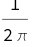

In [80]:
ℏn = Quantity["ReducedPlanckConstant"]/(EnergyUnit*TimeUnit)

### hyperfine Hamiltonian

In [81]:
Hhf = A*(Ix . Jx + Iy . Jy + Iz . Jz) - μB*Bz*(gI*Iz + gS*Sz + gL*Lz); 
hfc = {A -> (Quantity["PlanckConstant"]*Quantity[3.417341305452145, "GHz"])/EnergyUnit, gS -> -2.0023193043622, gL -> -0.99999369, gI -> Plus[0.0009951414], μB -> μBn, ℏ -> ℏn}; 

---
## static magnetic field

### diagonalize the Hamiltonian

In [83]:
{eval, evec} = FullSimplify[Eigensystem[Hhf]]; 

### plot the energy levels

-Graphics-
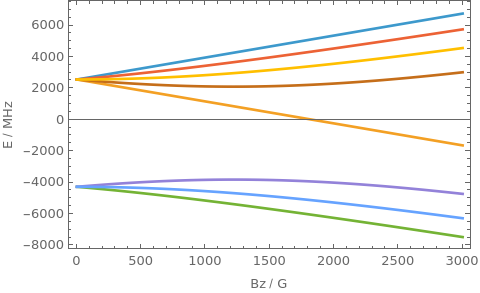

In [84]:
Plot[Evaluate[eval /. hfc], {Bz, 0, 3000}, Frame -> True, FrameLabel -> {"Bz / G", "E / MHz"}]

### analyze the energy eigenstates

In [85]:
nevec = (#1/Sqrt[#1 . #1] & ) /@ evec; 

#### field-free limit

In [86]:
Assuming[A > 0, FullSimplify[Limit[eval, Bz -> 0]]]

{0.750000000 A, 0.750000000 A, -1.2500000 A, 0.750000000 A, -1.2500000 A, 0.750000000 A, 
 
>   -1.2500000 A, 0.750000000 A}

In [87]:
nevec0 = Assuming[A > 0, FullSimplify[Limit[nevec, Bz -> 0]]]

{{1.00000000, 0, 0, 0, 0, 0, 0, 0}, {0, 0, 0, 0, 0, 0, 0, 1.00000000}, 
 
>   {0, -0.866025, 0.5000000, 0, 0, 0, 0, 0}, {0, 0.500000, 0.8660254, 0, 0, 0, 0, 0}, 
 
>   {0, 0, 0, 0, 0, -0.5000000, 0.8660254, 0}, {0, 0, 0, 0, 0, 0.8660254, 0.5000000, 0}, 
 
>   {0, 0, 0, -0.7071068, 0.7071068, 0, 0, 0}, {0, 0, 0, 0.7071068, 0.7071068, 0, 0, 0}}

6.0000000   0           0           0           0           0           0
 

>    0


0           6.0000000   0           0           0           0           0
 

>    0

                                         -6
0           0           2.00000     0. 10       0           0           0
 

>    0


0           0           0.          6.00000     0           0           0
 

>    0

                                                                 -6
0           0           0           0           2.000000    0. 10       0
 

>    0


0           0           0           0           0.          6.00000     0
 

>    0


0           0           0           0           0           0           2.000000
 
          -6
>    0. 10

                                                                             -6
0           0           0           0           0           0           0. 10
 

>    6.000000
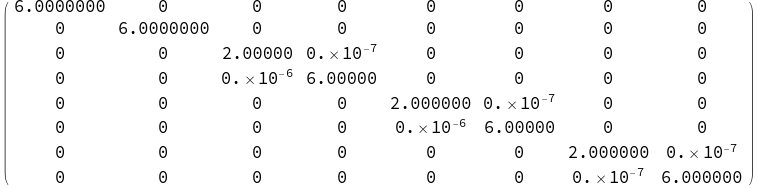

In [88]:
MatrixForm[nevec0 . (Fx . Fx + Fy . Fy + Fz . Fz) . Transpose[nevec0]]

2.00000000    0             0             0             0             0
 

>    0             0


0             -2.00000000   0             0             0             0
 

>    0             0

                                               -6
0             0             1.000000      0. 10         0             0
 

>    0             0

                                 -6
0             0             0. 10         1.000000      0             0
 

>    0             0

                                                                           -6
0             0             0             0             -1.000000     0. 10
 

>    0             0

                                                             -6
0             0             0             0             0. 10         -1.000000
 

>    0             0


0             0             0             0             0             0
 

>    0             0


0             0             0             0             0             0
 

>    0             0
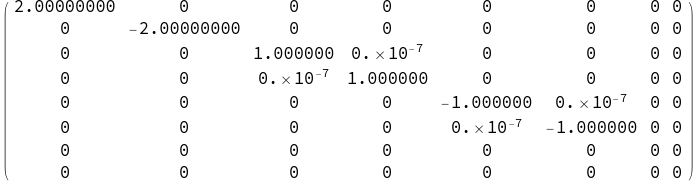

In [89]:
MatrixForm[nevec0 . Fz . Transpose[nevec0]]

#### low-field limit

2
{0.750000000 A + (-2.09943674 gI - 0.699812246 gS) Bz + O[Bz] , 
 
                                                               2
>   0.750000000 A + (2.09943674 gI + 0.699812246 gS) Bz + O[Bz] , 
 
                                                            2
>   -1.2500000 A + (-1.7495306 gI + 0.3499061 gS) Bz + O[Bz] , 
 
                                                             2
>   0.750000000 A + (-1.0497184 gI - 0.3499061 gS) Bz + O[Bz] , 
 
                                                           2
>   -1.2500000 A + (1.7495306 gI - 0.3499061 gS) Bz + O[Bz] , 
 
                                                            2                      2
>   0.750000000 A + (1.0497184 gI + 0.3499061 gS) Bz + O[Bz] , -1.2500000 A + O[Bz] , 
 
                       2
>   0.7500000 A + O[Bz] }
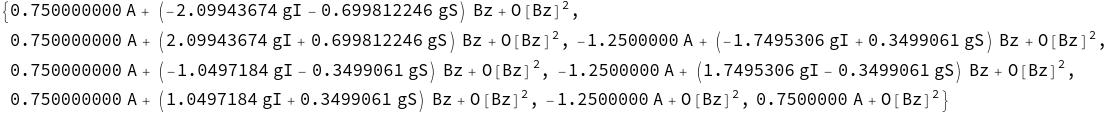

In [90]:
Assuming[A > 0, FullSimplify[Series[eval, {Bz, 0, 1}]]]

#### high-field limit

1
{(-2.09943674 gI - 0.699812246 gS) Bz + 0.750000000 A + -----, 
                                                        O[Bz]
 
                                                            1
>   (2.09943674 gI + 0.699812246 gS) Bz + 0.750000000 A + -----, 
                                                          O[Bz]
 
                                                  2                                 2
>   (-1.39962449 gI - 0.69981225 Sqrt[1.0000000 gI  - 2.0000000 gI gS + 1.0000000 gS ]) 
 
                                        -0.5000000 gI + 0.5000000 gS
>     Bz + A (-0.25000000 + -----------------------------------------------------) + 
                                             2                                 2
                            Sqrt[1.0000000 gI  - 2.0000000 gI gS + 1.0000000 gS ]
 
       1
>    -----, (-1.39962449 gI + 0.69981225 
     O[Bz]
 
                          2                                 2
>        Sqrt[1.0000000 gI  - 2.0000000 gI gS + 1.0000000 gS ]) Bz + 
 
                                   0.5000000 gI - 0.5000000 gS                   1
>    A (-0.25000000 + -----------------------------------------------------) + -----, 
                                       2                                 2     O[Bz]
                      Sqrt[1.0000000 gI  - 2.0000000 gI gS + 1.0000000 gS ]
 
                                                 2                                 2
>   (1.39962449 gI - 0.69981225 Sqrt[1.0000000 gI  - 2.0000000 gI gS + 1.0000000 gS ]) 
 
                                         0.5000000 gI - 0.5000000 gS
>     Bz + A (-0.25000000 + -----------------------------------------------------) + 
                                             2                                 2
                            Sqrt[1.0000000 gI  - 2.0000000 gI gS + 1.0000000 gS ]
 
       1
>    -----, (1.39962449 gI + 0.69981225 
     O[Bz]
 
                          2                                 2
>        Sqrt[1.0000000 gI  - 2.0000000 gI gS + 1.0000000 gS ]) Bz + 
 
                                  -0.5000000 gI + 0.5000000 gS                   1
>    A (-0.25000000 + -----------------------------------------------------) + -----, 
                                       2                                 2     O[Bz]
                      Sqrt[1.0000000 gI  - 2.0000000 gI gS + 1.0000000 gS ]
 
                                     2                                  2
>   -0.69981225 Bz Sqrt[1.00000000 gI  - 2.0000000 gI gS + 1.00000000 gS ] - 
 
                      1
>    0.25000000 A + -----, 0.69981225 Bz 
                    O[Bz]
 
                        2                                  2                     1
>     Sqrt[1.00000000 gI  - 2.0000000 gI gS + 1.00000000 gS ] - 0.25000000 A + -----}
                                                                               O[Bz]
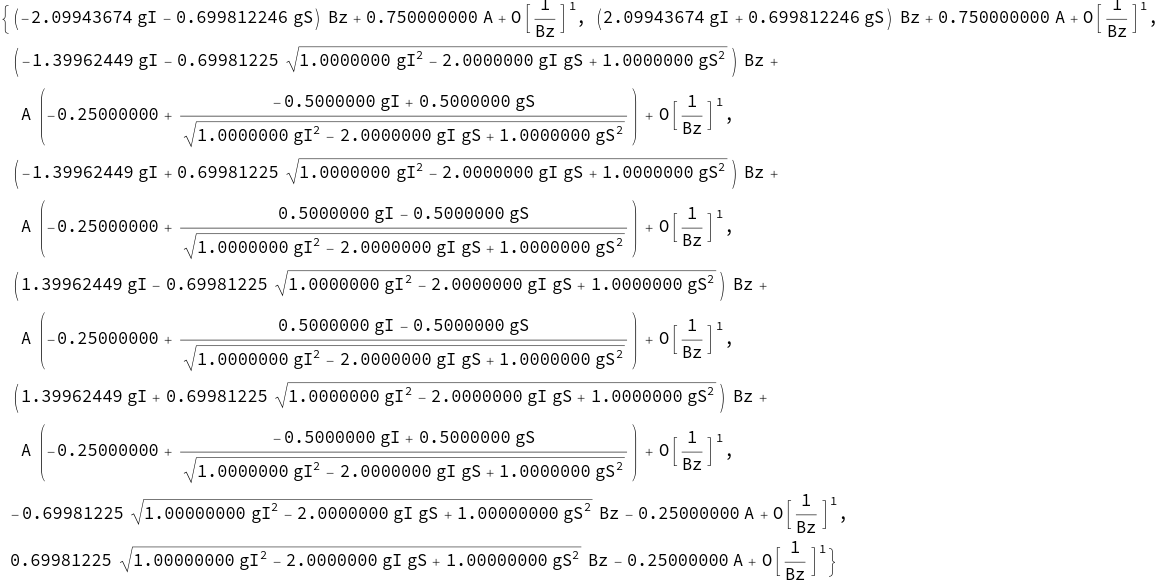

In [91]:
Assuming[μB > 0 && gS < -gI < 0, FullSimplify[Series[eval, {Bz, Infinity, 0}]]]

In [92]:
nevecinf = Assuming[μB > 0 && gS < -gI < 0, FullSimplify[Limit[nevec, Bz -> Infinity], A > 0]]

{{1.00000000, 0, 0, 0, 0, 0, 0, 0}, {0, 0, 0, 0, 0, 0, 0, 1.00000000}, 
 
>   {0, -1.000000, 0, 0, 0, 0, 0, 0}, {0, 1.000000, 0, 0, 0, 0, 0, 0}, 
 
>   {0, 0, 0, 0, 0, -1.000000, 0, 0}, {0, 0, 0, 0, 0, 1.000000, 0, 0}, 
 
>   {0, 0, 0, -1.000000, 0, 0, 0, 0}, {0, 0, 0, 1.000000, 0, 0, 0, 0}}

1.50000000    0             0             0             0             0
 
>    0             0

0             -1.50000000   0             0             0             0
 
>    0             0

0             0             1.500000      -1.500000     0             0
 
>    0             0

0             0             -1.500000     1.500000      0             0
 
>    0             0

0             0             0             0             -0.500000     0.500000
 
>    0             0

0             0             0             0             0.500000      -0.500000
 
>    0             0

0             0             0             0             0             0
 
>    0.5000000     -0.5000000

0             0             0             0             0             0
 
>    -0.5000000    0.5000000
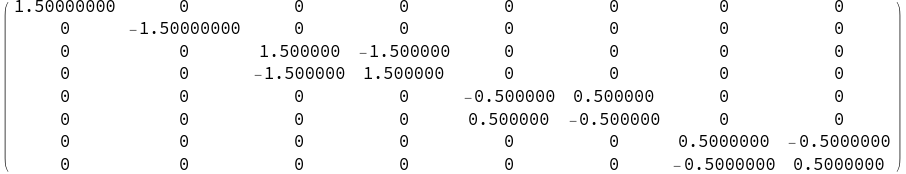

In [93]:
MatrixForm[nevecinf . Iz . Transpose[nevecinf]]

0.50000000    0             0             0             0             0
 
>    0             0

0             -0.50000000   0             0             0             0
 
>    0             0

0             0             -0.500000     0.500000      0             0
 
>    0             0

0             0             0.500000      -0.500000     0             0
 
>    0             0

0             0             0             0             -0.500000     0.500000
 
>    0             0

0             0             0             0             0.500000      -0.500000
 
>    0             0

0             0             0             0             0             0
 
>    -0.5000000    0.5000000

0             0             0             0             0             0
 
>    0.5000000     -0.5000000
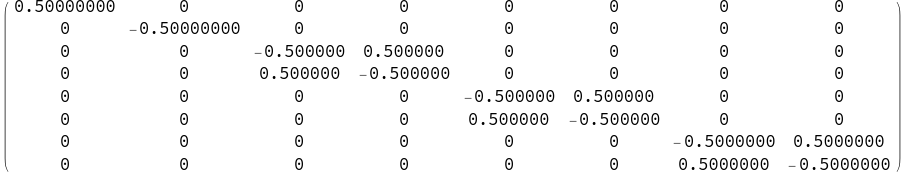

In [94]:
MatrixForm[nevecinf . Jz . Transpose[nevecinf]]

### “magic” magnetic field

-Graphics-
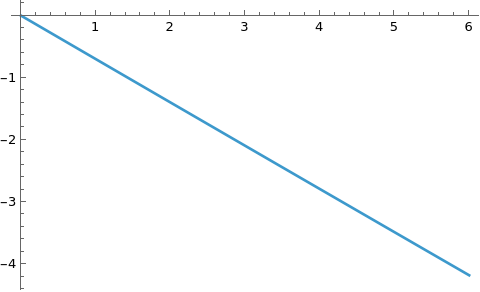

In [95]:
Plot[eval[[6]] - eval[[7]] - 2*A /. hfc, {Bz, 0, 6}]

In [96]:
NMinimize[eval[[6]] - eval[[7]] - 2*A /. hfc, Bz]

{-231.977, {Bz -> 651.899}}

good approximation to the magic field:

In [97]:
(A/μB)*((16*gI)/(3*gS^2)) /. hfc

3.23217

---
## oscillating magnetic field

### Hamiltonian

In [98]:
H0 = A*(Ix . Jx + Iy . Jy + Iz . Jz) - μB*Bz*(gS*Sz + gL*Lz + gI*Iz); 
H1 = (-μB)*(gS*(Bacx*Sx + Bacy*Sy + Bacz*Sz) + gI*(Bacx*Ix + Bacy*Iy + Bacz*Iz) + gL*(Bacx*Lx + Bacy*Ly + Bacz*Lz)); 
H[t_] = H0 + H1*Cos[ω*t]; 

### transition matrix elements

diagonalize the time-independent Hamiltonian  $H_0$ 



:

In [ ]:
{eval, evec} = FullSimplify[Eigensystem[H0]]; 
nevec = (#1/Sqrt[#1 . #1] & ) /@ evec; 

: 

compute the transition matrix elements induced by  $H_1$ 



 between the eigenstates of  $H_0$ 



:

In [1]:
T = Assuming[A > 0, FullSimplify[nevec . H1 . Transpose[nevec]]]; 

### solve time-dependent Schrödinger equation numerically

differential equations:

In [2]:
deqs = Table[I*ℏ*Derivative[1][Subscript[ψ, i]][t] == Sum[Subscript[ψ, j][t]*Exp[(-I)*(eval[[j]] - eval[[i]])*(t/ℏ)]*Cos[ω*t]*T[[i,j]], {j, 8}], {i, 8}]; 

Part::partd: Part specification eval[[1]] is longer than depth of object.

Part::partd: Part specification eval[[1]] is longer than depth of object.

Part::partd: Part specification (nevec . H1 . Transpose[nevec])[[1,1]] is longer than depth of object.

General::stop: Further output of Part::partd will be suppressed during this calculation.

Part::partw: Part 2 of Transpose[nevec] does not exist.

Part::partw: Part 3 of Transpose[nevec] does not exist.

Part::partw: Part 4 of Transpose[nevec] does not exist.

General::stop: Further output of Part::partw will be suppressed during this calculation.

numerical solution:

ReplaceAll::reps: {hfc} is neither a list of replacement rules nor a valid dispatch table, and so cannot be used for replacing.

ReplaceAll::reps: {hfc} is neither a list of replacement rules nor a valid dispatch table, and so cannot be used for replacing.

Join::heads: Heads ReplaceAll and List at positions 1 and 2 are expected to be the same.

NDSolve::deqn:                                                                                                                                      Cos[42901. t] (nevec . H1 . Transpose[nevec])[[1,2]] Ï [t]   Cos[42901. t] (nevec . H1 . Transpose[nevec])[[1,3]] Ï [t]   Cos[42901. t] (nevec . H1 . Transpose[nevec])[[1,4]] Ï [t]   Cos[42901. t] (nevec . H1 . Transpose[nevec])[[1,5]] Ï [t]   Cos[42901. t] (nevec . H1 . Transpose[nevec])[[1,6]] Ï [t]   Cos[42901. t] (nevec . H1 . Transpose[nevec])[[1,7]] Ï [t]   Cos[42901. t] (nevec . H1 . Transpose[nevec])[[1,8]] Ï [t]                  Cos[42901. t] (nevec . H1 . Transpose[nevec])[[2,1]] Ï [t]                                                                Cos[42901. t] (nevec . H1 . Transpose[nevec])[[2,3]] Ï [t]   Cos[42901. t] (nevec . H1 . Transpose[nevec])[[2,4]] Ï [t]   Cos[42901. t] (nevec . H1 . Transpose[nevec])[[2,5]] Ï [t]   Cos[42901. t] (nevec . H1 . Transpose[nevec])[[2,6]] Ï [t]   Cos[42901. t] (nevec . H1 . Transpose[nevec])[[2,7]] Ï [t]   Cos[42901. t] (nevec . H1 . Transpose[nevec])[[2,8]] Ï [t]                     nevec Cos[42901. t] Ï [t]       Cos[42901. t] (nevec . H1 . Transpose[nevec])[[3,2]] Ï [t]                                                                Cos[42901. t] (nevec . H1 . Transpose[nevec])[[3,4]] Ï [t]   Cos[42901. t] (nevec . H1 . Transpose[nevec])[[3,5]] Ï [t]   Cos[42901. t] (nevec . H1 . Transpose[nevec])[[3,6]] Ï [t]   Cos[42901. t] (nevec . H1 . Transpose[nevec])[[3,7]] Ï [t]   Cos[42901. t] (nevec . H1 . Transpose[nevec])[[3,8]] Ï [t]                  Cos[42901. t] (nevec . H1 . Transpose[nevec])[[4,1]] Ï [t]   Cos[42901. t] (nevec . H1 . Transpose[nevec])[[4,2]] Ï [t]   Cos[42901. t] (nevec . H1 . Transpose[nevec])[[4,3]] Ï [t]                                                                Cos[42901. t] (nevec . H1 . Transpose[nevec])[[4,5]] Ï [t]   Cos[42901. t] (nevec . H1 . Transpose[nevec])[[4,6]] Ï [t]   Cos[42901. t] (nevec . H1 . Transpose[nevec])[[4,7]] Ï [t]   Cos[42901. t] (nevec . H1 . Transpose[nevec])[[4,8]] Ï [t]                  Cos[42901. t] (nevec . H1 . Transpose[nevec])[[5,1]] Ï [t]   Cos[42901. t] (nevec . H1 . Transpose[nevec])[[5,2]] Ï [t]   Cos[42901. t] (nevec . H1 . Transpose[nevec])[[5,3]] Ï [t]   Cos[42901. t] (nevec . H1 . Transpose[nevec])[[5,4]] Ï [t]                                                                Cos[42901. t] (nevec . H1 . Transpose[nevec])[[5,6]] Ï [t]   Cos[42901. t] (nevec . H1 . Transpose[nevec])[[5,7]] Ï [t]   Cos[42901. t] (nevec . H1 . Transpose[nevec])[[5,8]] Ï [t]                  Cos[42901. t] (nevec . H1 . Transpose[nevec])[[6,1]] Ï [t]   Cos[42901. t] (nevec . H1 . Transpose[nevec])[[6,2]] Ï [t]   Cos[42901. t] (nevec . H1 . Transpose[nevec])[[6,3]] Ï [t]   Cos[42901. t] (nevec . H1 . Transpose[nevec])[[6,4]] Ï [t]   Cos[42901. t] (nevec . H1 . Transpose[nevec])[[6,5]] Ï [t]                                                                Cos[42901. t] (nevec . H1 . Transpose[nevec])[[6,7]] Ï [t]   Cos[42901. t] (nevec . H1 . Transpose[nevec])[[6,8]] Ï [t]                  Cos[42901. t] (nevec . H1 . Transpose[nevec])[[7,1]] Ï [t]   Cos[42901. t] (nevec . H1 . Transpose[nevec])[[7,2]] Ï [t]   Cos[42901. t] (nevec . H1 . Transpose[nevec])[[7,3]] Ï [t]   Cos[42901. t] (nevec . H1 . Transpose[nevec])[[7,4]] Ï [t]   Cos[42901. t] (nevec . H1 . Transpose[nevec])[[7,5]] Ï [t]   Cos[42901. t] (nevec . H1 . Transpose[nevec])[[7,6]] Ï [t]                                                                Cos[42901. t] (nevec . H1 . Transpose[nevec])[[7,8]] Ï [t]                  Cos[42901. t] (nevec . H1 . Transpose[nevec])[[8,1]] Ï [t]   Cos[42901. t] (nevec . H1 . Transpose[nevec])[[8,2]] Ï [t]   Cos[42901. t] (nevec . H1 . Transpose[nevec])[[8,3]] Ï [t]   Cos[42901. t] (nevec . H1 . Transpose[nevec])[[8,4]] Ï [t]   Cos[42901. t] (nevec . H1 . Transpose[nevec])[[8,5]] Ï [t]   Cos[42901. t] (nevec . H1 . Transpose[nevec])[[8,6]] Ï [t]   Cos[42901. t] (nevec . H1 . Transpose[nevec])[[8,7]] Ï [t]                                                                                                                                                                                                                                                                                  Cos[42901. t] (nevec . H1 . Transpose[nevec])[[1,2]] Ï [t]   Cos[42901. t] (nevec . H1 . Transpose[nevec])[[1,3]] Ï [t]   Cos[42901. t] (nevec . H1 . Transpose[nevec])[[1,4]] Ï [t]   Cos[42901. t] (nevec . H1 . Transpose[nevec])[[1,5]] Ï [t]   Cos[42901. t] (nevec . H1 . Transpose[nevec])[[1,6]] Ï [t]   Cos[42901. t] (nevec . H1 . Transpose[nevec])[[1,7]] Ï [t]   Cos[42901. t] (nevec . H1 . Transpose[nevec])[[1,8]] Ï [t]                  Cos[42901. t] (nevec . H1 . Transpose[nevec])[[2,1]] Ï [t]                                                                Cos[42901. t] (nevec . H1 . Transpose[nevec])[[2,3]] Ï [t]   Cos[42901. t] (nevec . H1 . Transpose[nevec])[[2,4]] Ï [t]   Cos[42901. t] (nevec . H1 . Transpose[nevec])[[2,5]] Ï [t]   Cos[42901. t] (nevec . H1 . Transpose[nevec])[[2,6]] Ï [t]   Cos[42901. t] (nevec . H1 . Transpose[nevec])[[2,7]] Ï [t]   Cos[42901. t] (nevec . H1 . Transpose[nevec])[[2,8]] Ï [t]                     nevec Cos[42901. t] Ï [t]       Cos[42901. t] (nevec . H1 . Transpose[nevec])[[3,2]] Ï [t]                                                                Cos[42901. t] (nevec . H1 . Transpose[nevec])[[3,4]] Ï [t]   Cos[42901. t] (nevec . H1 . Transpose[nevec])[[3,5]] Ï [t]   Cos[42901. t] (nevec . H1 . Transpose[nevec])[[3,6]] Ï [t]   Cos[42901. t] (nevec . H1 . Transpose[nevec])[[3,7]] Ï [t]   Cos[42901. t] (nevec . H1 . Transpose[nevec])[[3,8]] Ï [t]                  Cos[42901. t] (nevec . H1 . Transpose[nevec])[[4,1]] Ï [t]   Cos[42901. t] (nevec . H1 . Transpose[nevec])[[4,2]] Ï [t]   Cos[42901. t] (nevec . H1 . Transpose[nevec])[[4,3]] Ï [t]                                                                Cos[42901. t] (nevec . H1 . Transpose[nevec])[[4,5]] Ï [t]   Cos[42901. t] (nevec . H1 . Transpose[nevec])[[4,6]] Ï [t]   Cos[42901. t] (nevec . H1 . Transpose[nevec])[[4,7]] Ï [t]   Cos[42901. t] (nevec . H1 . Transpose[nevec])[[4,8]] Ï [t]                  Cos[42901. t] (nevec . H1 . Transpose[nevec])[[5,1]] Ï [t]   Cos[42901. t] (nevec . H1 . Transpose[nevec])[[5,2]] Ï [t]   Cos[42901. t] (nevec . H1 . Transpose[nevec])[[5,3]] Ï [t]   Cos[42901. t] (nevec . H1 . Transpose[nevec])[[5,4]] Ï [t]                                                                Cos[42901. t] (nevec . H1 . Transpose[nevec])[[5,6]] Ï [t]   Cos[42901. t] (nevec . H1 . Transpose[nevec])[[5,7]] Ï [t]   Cos[42901. t] (nevec . H1 . Transpose[nevec])[[5,8]] Ï [t]                  Cos[42901. t] (nevec . H1 . Transpose[nevec])[[6,1]] Ï [t]   Cos[42901. t] (nevec . H1 . Transpose[nevec])[[6,2]] Ï [t]   Cos[42901. t] (nevec . H1 . Transpose[nevec])[[6,3]] Ï [t]   Cos[42901. t] (nevec . H1 . Transpose[nevec])[[6,4]] Ï [t]   Cos[42901. t] (nevec . H1 . Transpose[nevec])[[6,5]] Ï [t]                                                                Cos[42901. t] (nevec . H1 . Transpose[nevec])[[6,7]] Ï [t]   Cos[42901. t] (nevec . H1 . Transpose[nevec])[[6,8]] Ï [t]                  Cos[42901. t] (nevec . H1 . Transpose[nevec])[[7,1]] Ï [t]   Cos[42901. t] (nevec . H1 . Transpose[nevec])[[7,2]] Ï [t]   Cos[42901. t] (nevec . H1 . Transpose[nevec])[[7,3]] Ï [t]   Cos[42901. t] (nevec . H1 . Transpose[nevec])[[7,4]] Ï [t]   Cos[42901. t] (nevec . H1 . Transpose[nevec])[[7,5]] Ï [t]   Cos[42901. t] (nevec . H1 . Transpose[nevec])[[7,6]] Ï [t]                                                                Cos[42901. t] (nevec . H1 . Transpose[nevec])[[7,8]] Ï [t]                  Cos[42901. t] (nevec . H1 . Transpose[nevec])[[8,1]] Ï [t]   Cos[42901. t] (nevec . H1 . Transpose[nevec])[[8,2]] Ï [t]   Cos[42901. t] (nevec . H1 . Transpose[nevec])[[8,3]] Ï [t]   Cos[42901. t] (nevec . H1 . Transpose[nevec])[[8,4]] Ï [t]   Cos[42901. t] (nevec . H1 . Transpose[nevec])[[8,5]] Ï [t]   Cos[42901. t] (nevec . H1 . Transpose[nevec])[[8,6]] Ï [t]   Cos[42901. t] (nevec . H1 . Transpose[nevec])[[8,7]] Ï [t]
                                                                                                                                                                                           2                                                            3                                                            4                                                            5                                                            6                                                            7                                                            8                                                                           1                                                                                                                         3                                                            4                                                            5                                                            6                                                            7                                                            8                                             1                                                                2                                                                                                                         4                                                            5                                                            6                                                            7                                                            8                                                                           1                                                            2                                                            3                                                                                                                         5                                                            6                                                            7                                                            8                                                                           1                                                            2                                                            3                                                            4                                                                                                                         6                                                            7                                                            8                                                                           1                                                            2                                                            3                                                            4                                                            5                                                                                                                         7                                                            8                                                                           1                                                            2                                                            3                                                            4                                                            5                                                            6                                                                                                                         8                                                                           1                                                            2                                                            3                                                            4                                                            5                                                            6                                                            7                                                                                                                                                                                                                                                                                                                                           2                                                            3                                                            4                                                            5                                                            6                                                            7                                                            8                                                                           1                                                                                                                         3                                                            4                                                            5                                                            6                                                            7                                                            8                                             1                                                                2                                                                                                                         4                                                            5                                                            6                                                            7                                                            8                                                                           1                                                            2                                                            3                                                                                                                         5                                                            6                                                            7                                                            8                                                                           1                                                            2                                                            3                                                            4                                                                                                                         6                                                            7                                                            8                                                                           1                                                            2                                                            3                                                            4                                                            5                                                                                                                         7                                                            8                                                                           1                                                            2                                                            3                                                            4                                                            5                                                            6                                                                                                                         8                                                                           1                                                            2                                                            3                                                            4                                                            5                                                            6                                                            7
Equation or list of equations expected instead of Join[{I â (Ï )'[t] == Cos[42901. t] (nevec . H1 . Transpose[nevec])[[1,1]] Ï [t] + ---------------------------------------------------------- + ---------------------------------------------------------- + ---------------------------------------------------------- + ---------------------------------------------------------- + ---------------------------------------------------------- + ---------------------------------------------------------- + ----------------------------------------------------------, I â (Ï )'[t] == ---------------------------------------------------------- + Cos[42901. t] (nevec . H1 . Transpose[nevec])[[2,2]] Ï [t] + ---------------------------------------------------------- + ---------------------------------------------------------- + ---------------------------------------------------------- + ---------------------------------------------------------- + ---------------------------------------------------------- + ----------------------------------------------------------, I â (Ï )'[t] == -------------------------------- + ---------------------------------------------------------- + Cos[42901. t] (nevec . H1 . Transpose[nevec])[[3,3]] Ï [t] + ---------------------------------------------------------- + ---------------------------------------------------------- + ---------------------------------------------------------- + ---------------------------------------------------------- + ----------------------------------------------------------, I â (Ï )'[t] == ---------------------------------------------------------- + ---------------------------------------------------------- + ---------------------------------------------------------- + Cos[42901. t] (nevec . H1 . Transpose[nevec])[[4,4]] Ï [t] + ---------------------------------------------------------- + ---------------------------------------------------------- + ---------------------------------------------------------- + ----------------------------------------------------------, I â (Ï )'[t] == ---------------------------------------------------------- + ---------------------------------------------------------- + ---------------------------------------------------------- + ---------------------------------------------------------- + Cos[42901. t] (nevec . H1 . Transpose[nevec])[[5,5]] Ï [t] + ---------------------------------------------------------- + ---------------------------------------------------------- + ----------------------------------------------------------, I â (Ï )'[t] == ---------------------------------------------------------- + ---------------------------------------------------------- + ---------------------------------------------------------- + ---------------------------------------------------------- + ---------------------------------------------------------- + Cos[42901. t] (nevec . H1 . Transpose[nevec])[[6,6]] Ï [t] + ---------------------------------------------------------- + ----------------------------------------------------------, I â (Ï )'[t] == ---------------------------------------------------------- + ---------------------------------------------------------- + ---------------------------------------------------------- + ---------------------------------------------------------- + ---------------------------------------------------------- + ---------------------------------------------------------- + Cos[42901. t] (nevec . H1 . Transpose[nevec])[[7,7]] Ï [t] + ----------------------------------------------------------, I â (Ï )'[t] == ---------------------------------------------------------- + ---------------------------------------------------------- + ---------------------------------------------------------- + ---------------------------------------------------------- + ---------------------------------------------------------- + ---------------------------------------------------------- + ---------------------------------------------------------- + Cos[42901. t] (nevec . H1 . Transpose[nevec])[[8,8]] Ï [t]} /. hfc, {Ï [0] == 0, Ï [0] == 1, Ï [0] == 0, Ï [0] == 0, Ï [0] == 0, Ï [0] == 0, Ï [0] == 0, Ï [0] == 0}] in the first argument Join[{I â (Ï )'[t] == Cos[42901. t] (nevec . H1 . Transpose[nevec])[[1,1]] Ï [t] + ---------------------------------------------------------- + ---------------------------------------------------------- + ---------------------------------------------------------- + ---------------------------------------------------------- + ---------------------------------------------------------- + ---------------------------------------------------------- + ----------------------------------------------------------, I â (Ï )'[t] == ---------------------------------------------------------- + Cos[42901. t] (nevec . H1 . Transpose[nevec])[[2,2]] Ï [t] + ---------------------------------------------------------- + ---------------------------------------------------------- + ---------------------------------------------------------- + ---------------------------------------------------------- + ---------------------------------------------------------- + ----------------------------------------------------------, I â (Ï )'[t] == -------------------------------- + ---------------------------------------------------------- + Cos[42901. t] (nevec . H1 . Transpose[nevec])[[3,3]] Ï [t] + ---------------------------------------------------------- + ---------------------------------------------------------- + ---------------------------------------------------------- + ---------------------------------------------------------- + ----------------------------------------------------------, I â (Ï )'[t] == ---------------------------------------------------------- + ---------------------------------------------------------- + ---------------------------------------------------------- + Cos[42901. t] (nevec . H1 . Transpose[nevec])[[4,4]] Ï [t] + ---------------------------------------------------------- + ---------------------------------------------------------- + ---------------------------------------------------------- + ----------------------------------------------------------, I â (Ï )'[t] == ---------------------------------------------------------- + ---------------------------------------------------------- + ---------------------------------------------------------- + ---------------------------------------------------------- + Cos[42901. t] (nevec . H1 . Transpose[nevec])[[5,5]] Ï [t] + ---------------------------------------------------------- + ---------------------------------------------------------- + ----------------------------------------------------------, I â (Ï )'[t] == ---------------------------------------------------------- + ---------------------------------------------------------- + ---------------------------------------------------------- + ---------------------------------------------------------- + ---------------------------------------------------------- + Cos[42901. t] (nevec . H1 . Transpose[nevec])[[6,6]] Ï [t] + ---------------------------------------------------------- + ----------------------------------------------------------, I â (Ï )'[t] == ---------------------------------------------------------- + ---------------------------------------------------------- + ---------------------------------------------------------- + ---------------------------------------------------------- + ---------------------------------------------------------- + ---------------------------------------------------------- + Cos[42901. t] (nevec . H1 . Transpose[nevec])[[7,7]] Ï [t] + ----------------------------------------------------------, I â (Ï )'[t] == ---------------------------------------------------------- + ---------------------------------------------------------- + ---------------------------------------------------------- + ---------------------------------------------------------- + ---------------------------------------------------------- + ---------------------------------------------------------- + ---------------------------------------------------------- + Cos[42901. t] (nevec . H1 . Transpose[nevec])[[8,8]] Ï [t]} /. hfc, {Ï [0] == 0, Ï [0] == 1, Ï [0] == 0, Ï [0] == 0, Ï [0] == 0, Ï [0] == 0, Ï [0] == 0, Ï [0] == 0}].
                                                              1                                                               1                   (I t (-eval[[1]] + eval[[2]]))/â                             (I t (-eval[[1]] + eval[[3]]))/â                             (I t (-eval[[1]] + eval[[4]]))/â                             (I t (-eval[[1]] + eval[[5]]))/â                             (I t (-eval[[1]] + eval[[6]]))/â                             (I t (-eval[[1]] + eval[[7]]))/â                             (I t (-eval[[1]] + eval[[8]]))/â                     2                       (I t (eval[[1]] - eval[[2]]))/â                                                                      2                   (I t (-eval[[2]] + eval[[3]]))/â                             (I t (-eval[[2]] + eval[[4]]))/â                             (I t (-eval[[2]] + eval[[5]]))/â                             (I t (-eval[[2]] + eval[[6]]))/â                             (I t (-eval[[2]] + eval[[7]]))/â                             (I t (-eval[[2]] + eval[[8]]))/â                     3          (I t (eval[[1]] - eval[[3]]))/â                 (I t (eval[[2]] - eval[[3]]))/â                                                                      3                   (I t (-eval[[3]] + eval[[4]]))/â                             (I t (-eval[[3]] + eval[[5]]))/â                             (I t (-eval[[3]] + eval[[6]]))/â                             (I t (-eval[[3]] + eval[[7]]))/â                             (I t (-eval[[3]] + eval[[8]]))/â                     4                       (I t (eval[[1]] - eval[[4]]))/â                              (I t (eval[[2]] - eval[[4]]))/â                              (I t (eval[[3]] - eval[[4]]))/â                                                                      4                   (I t (-eval[[4]] + eval[[5]]))/â                             (I t (-eval[[4]] + eval[[6]]))/â                             (I t (-eval[[4]] + eval[[7]]))/â                             (I t (-eval[[4]] + eval[[8]]))/â                     5                       (I t (eval[[1]] - eval[[5]]))/â                              (I t (eval[[2]] - eval[[5]]))/â                              (I t (eval[[3]] - eval[[5]]))/â                              (I t (eval[[4]] - eval[[5]]))/â                                                                      5                   (I t (-eval[[5]] + eval[[6]]))/â                             (I t (-eval[[5]] + eval[[7]]))/â                             (I t (-eval[[5]] + eval[[8]]))/â                     6                       (I t (eval[[1]] - eval[[6]]))/â                              (I t (eval[[2]] - eval[[6]]))/â                              (I t (eval[[3]] - eval[[6]]))/â                              (I t (eval[[4]] - eval[[6]]))/â                              (I t (eval[[5]] - eval[[6]]))/â                                                                      6                   (I t (-eval[[6]] + eval[[7]]))/â                             (I t (-eval[[6]] + eval[[8]]))/â                     7                       (I t (eval[[1]] - eval[[7]]))/â                              (I t (eval[[2]] - eval[[7]]))/â                              (I t (eval[[3]] - eval[[7]]))/â                              (I t (eval[[4]] - eval[[7]]))/â                              (I t (eval[[5]] - eval[[7]]))/â                              (I t (eval[[6]] - eval[[7]]))/â                                                                      7                   (I t (-eval[[7]] + eval[[8]]))/â                     8                       (I t (eval[[1]] - eval[[8]]))/â                              (I t (eval[[2]] - eval[[8]]))/â                              (I t (eval[[3]] - eval[[8]]))/â                              (I t (eval[[4]] - eval[[8]]))/â                              (I t (eval[[5]] - eval[[8]]))/â                              (I t (eval[[6]] - eval[[8]]))/â                              (I t (eval[[7]] - eval[[8]]))/â                                                                      8               1           2           3           4           5           6           7           8                                             1                                                               1                   (I t (-eval[[1]] + eval[[2]]))/â                             (I t (-eval[[1]] + eval[[3]]))/â                             (I t (-eval[[1]] + eval[[4]]))/â                             (I t (-eval[[1]] + eval[[5]]))/â                             (I t (-eval[[1]] + eval[[6]]))/â                             (I t (-eval[[1]] + eval[[7]]))/â                             (I t (-eval[[1]] + eval[[8]]))/â                     2                       (I t (eval[[1]] - eval[[2]]))/â                                                                      2                   (I t (-eval[[2]] + eval[[3]]))/â                             (I t (-eval[[2]] + eval[[4]]))/â                             (I t (-eval[[2]] + eval[[5]]))/â                             (I t (-eval[[2]] + eval[[6]]))/â                             (I t (-eval[[2]] + eval[[7]]))/â                             (I t (-eval[[2]] + eval[[8]]))/â                     3          (I t (eval[[1]] - eval[[3]]))/â                 (I t (eval[[2]] - eval[[3]]))/â                                                                      3                   (I t (-eval[[3]] + eval[[4]]))/â                             (I t (-eval[[3]] + eval[[5]]))/â                             (I t (-eval[[3]] + eval[[6]]))/â                             (I t (-eval[[3]] + eval[[7]]))/â                             (I t (-eval[[3]] + eval[[8]]))/â                     4                       (I t (eval[[1]] - eval[[4]]))/â                              (I t (eval[[2]] - eval[[4]]))/â                              (I t (eval[[3]] - eval[[4]]))/â                                                                      4                   (I t (-eval[[4]] + eval[[5]]))/â                             (I t (-eval[[4]] + eval[[6]]))/â                             (I t (-eval[[4]] + eval[[7]]))/â                             (I t (-eval[[4]] + eval[[8]]))/â                     5                       (I t (eval[[1]] - eval[[5]]))/â                              (I t (eval[[2]] - eval[[5]]))/â                              (I t (eval[[3]] - eval[[5]]))/â                              (I t (eval[[4]] - eval[[5]]))/â                                                                      5                   (I t (-eval[[5]] + eval[[6]]))/â                             (I t (-eval[[5]] + eval[[7]]))/â                             (I t (-eval[[5]] + eval[[8]]))/â                     6                       (I t (eval[[1]] - eval[[6]]))/â                              (I t (eval[[2]] - eval[[6]]))/â                              (I t (eval[[3]] - eval[[6]]))/â                              (I t (eval[[4]] - eval[[6]]))/â                              (I t (eval[[5]] - eval[[6]]))/â                                                                      6                   (I t (-eval[[6]] + eval[[7]]))/â                             (I t (-eval[[6]] + eval[[8]]))/â                     7                       (I t (eval[[1]] - eval[[7]]))/â                              (I t (eval[[2]] - eval[[7]]))/â                              (I t (eval[[3]] - eval[[7]]))/â                              (I t (eval[[4]] - eval[[7]]))/â                              (I t (eval[[5]] - eval[[7]]))/â                              (I t (eval[[6]] - eval[[7]]))/â                                                                      7                   (I t (-eval[[7]] + eval[[8]]))/â                     8                       (I t (eval[[1]] - eval[[8]]))/â                              (I t (eval[[2]] - eval[[8]]))/â                              (I t (eval[[3]] - eval[[8]]))/â                              (I t (eval[[4]] - eval[[8]]))/â                              (I t (eval[[5]] - eval[[8]]))/â                              (I t (eval[[6]] - eval[[8]]))/â                              (I t (eval[[7]] - eval[[8]]))/â                                                                      8               1           2           3           4           5           6           7           8
                                                                                                                                                 E                                                            E                                                            E                                                            E                                                            E                                                            E                                                            E                                                                            E                                                                                                                        E                                                            E                                                            E                                                            E                                                            E                                                            E                                                               E                                               E                                                                                                                        E                                                            E                                                            E                                                            E                                                            E                                                                            E                                                            E                                                            E                                                                                                                        E                                                            E                                                            E                                                            E                                                                            E                                                            E                                                            E                                                            E                                                                                                                        E                                                            E                                                            E                                                                            E                                                            E                                                            E                                                            E                                                            E                                                                                                                        E                                                            E                                                                            E                                                            E                                                            E                                                            E                                                            E                                                            E                                                                                                                        E                                                                            E                                                            E                                                            E                                                            E                                                            E                                                            E                                                            E                                                                                                                                                                                                                                                                                                                                          E                                                            E                                                            E                                                            E                                                            E                                                            E                                                            E                                                                            E                                                                                                                        E                                                            E                                                            E                                                            E                                                            E                                                            E                                                               E                                               E                                                                                                                        E                                                            E                                                            E                                                            E                                                            E                                                                            E                                                            E                                                            E                                                                                                                        E                                                            E                                                            E                                                            E                                                                            E                                                            E                                                            E                                                            E                                                                                                                        E                                                            E                                                            E                                                                            E                                                            E                                                            E                                                            E                                                            E                                                                                                                        E                                                            E                                                                            E                                                            E                                                            E                                                            E                                                            E                                                            E                                                                                                                        E                                                                            E                                                            E                                                            E                                                            E                                                            E                                                            E                                                            E

NDSolve[Join[{I ℏ (ψ )'[t] == Cos[42901. t] (nevec . H1 . Transpose[nevec])[[1,1]] 
                    1
 
                  Cos[42901. t] (nevec . H1 . Transpose[nevec])[[1,2]] ψ [t]
                                                                        2
>         ψ [t] + ---------------------------------------------------------- + 
           1                   (I t (-eval[[1]] + eval[[2]]))/ℏ
                              E
 
         Cos[42901. t] (nevec . H1 . Transpose[nevec])[[1,3]] ψ [t]
                                                               3
>        ---------------------------------------------------------- + 
                      (I t (-eval[[1]] + eval[[3]]))/ℏ
                     E
 
         Cos[42901. t] (nevec . H1 . Transpose[nevec])[[1,4]] ψ [t]
                                                               4
>        ---------------------------------------------------------- + 
                      (I t (-eval[[1]] + eval[[4]]))/ℏ
                     E
 
         Cos[42901. t] (nevec . H1 . Transpose[nevec])[[1,5]] ψ [t]
                                                               5
>        ---------------------------------------------------------- + 
                      (I t (-eval[[1]] + eval[[5]]))/ℏ
                     E
 
         Cos[42901. t] (nevec . H1 . Transpose[nevec])[[1,6]] ψ [t]
                                                               6
>        ---------------------------------------------------------- + 
                      (I t (-eval[[1]] + eval[[6]]))/ℏ
                     E
 
         Cos[42901. t] (nevec . H1 . Transpose[nevec])[[1,7]] ψ [t]
                                                               7
>        ---------------------------------------------------------- + 
                      (I t (-eval[[1]] + eval[[7]]))/ℏ
                     E
 
         Cos[42901. t] (nevec . H1 . Transpose[nevec])[[1,8]] ψ [t]
                                                               8
>        ----------------------------------------------------------, 
                      (I t (-eval[[1]] + eval[[8]]))/ℏ
                     E
 
                       Cos[42901. t] (nevec . H1 . Transpose[nevec])[[2,1]] ψ [t]
                                                                             1
>      I ℏ (ψ )'[t] == ---------------------------------------------------------- + 
             2                       (I t (eval[[1]] - eval[[2]]))/ℏ
                                    E
 
>        Cos[42901. t] (nevec . H1 . Transpose[nevec])[[2,2]] ψ [t] + 
                                                               2
 
         Cos[42901. t] (nevec . H1 . Transpose[nevec])[[2,3]] ψ [t]
                                                               3
>        ---------------------------------------------------------- + 
                      (I t (-eval[[2]] + eval[[3]]))/ℏ
                     E
 
         Cos[42901. t] (nevec . H1 . Transpose[nevec])[[2,4]] ψ [t]
                                                               4
>        ---------------------------------------------------------- + 
                      (I t (-eval[[2]] + eval[[4]]))/ℏ
                     E
 
         Cos[42901. t] (nevec . H1 . Transpose[nevec])[[2,5]] ψ [t]
                                                               5
>        ---------------------------------------------------------- + 
                      (I t (-eval[[2]] + eval[[5]]))/ℏ
                     E
 
         Cos[42901. t] (nevec . H1 . Transpose[nevec])[[2,6]] ψ [t]
                                                               6
>        ---------------------------------------------------------- + 
                      (I t (-eval[[2]] + eval[[6]]))/ℏ
                     E
 
         Cos[42901. t] (nevec . H1 . Transpose[nevec])[[2,7]] ψ [t]
                                                               7
>        ---------------------------------------------------------- + 
                      (I t 
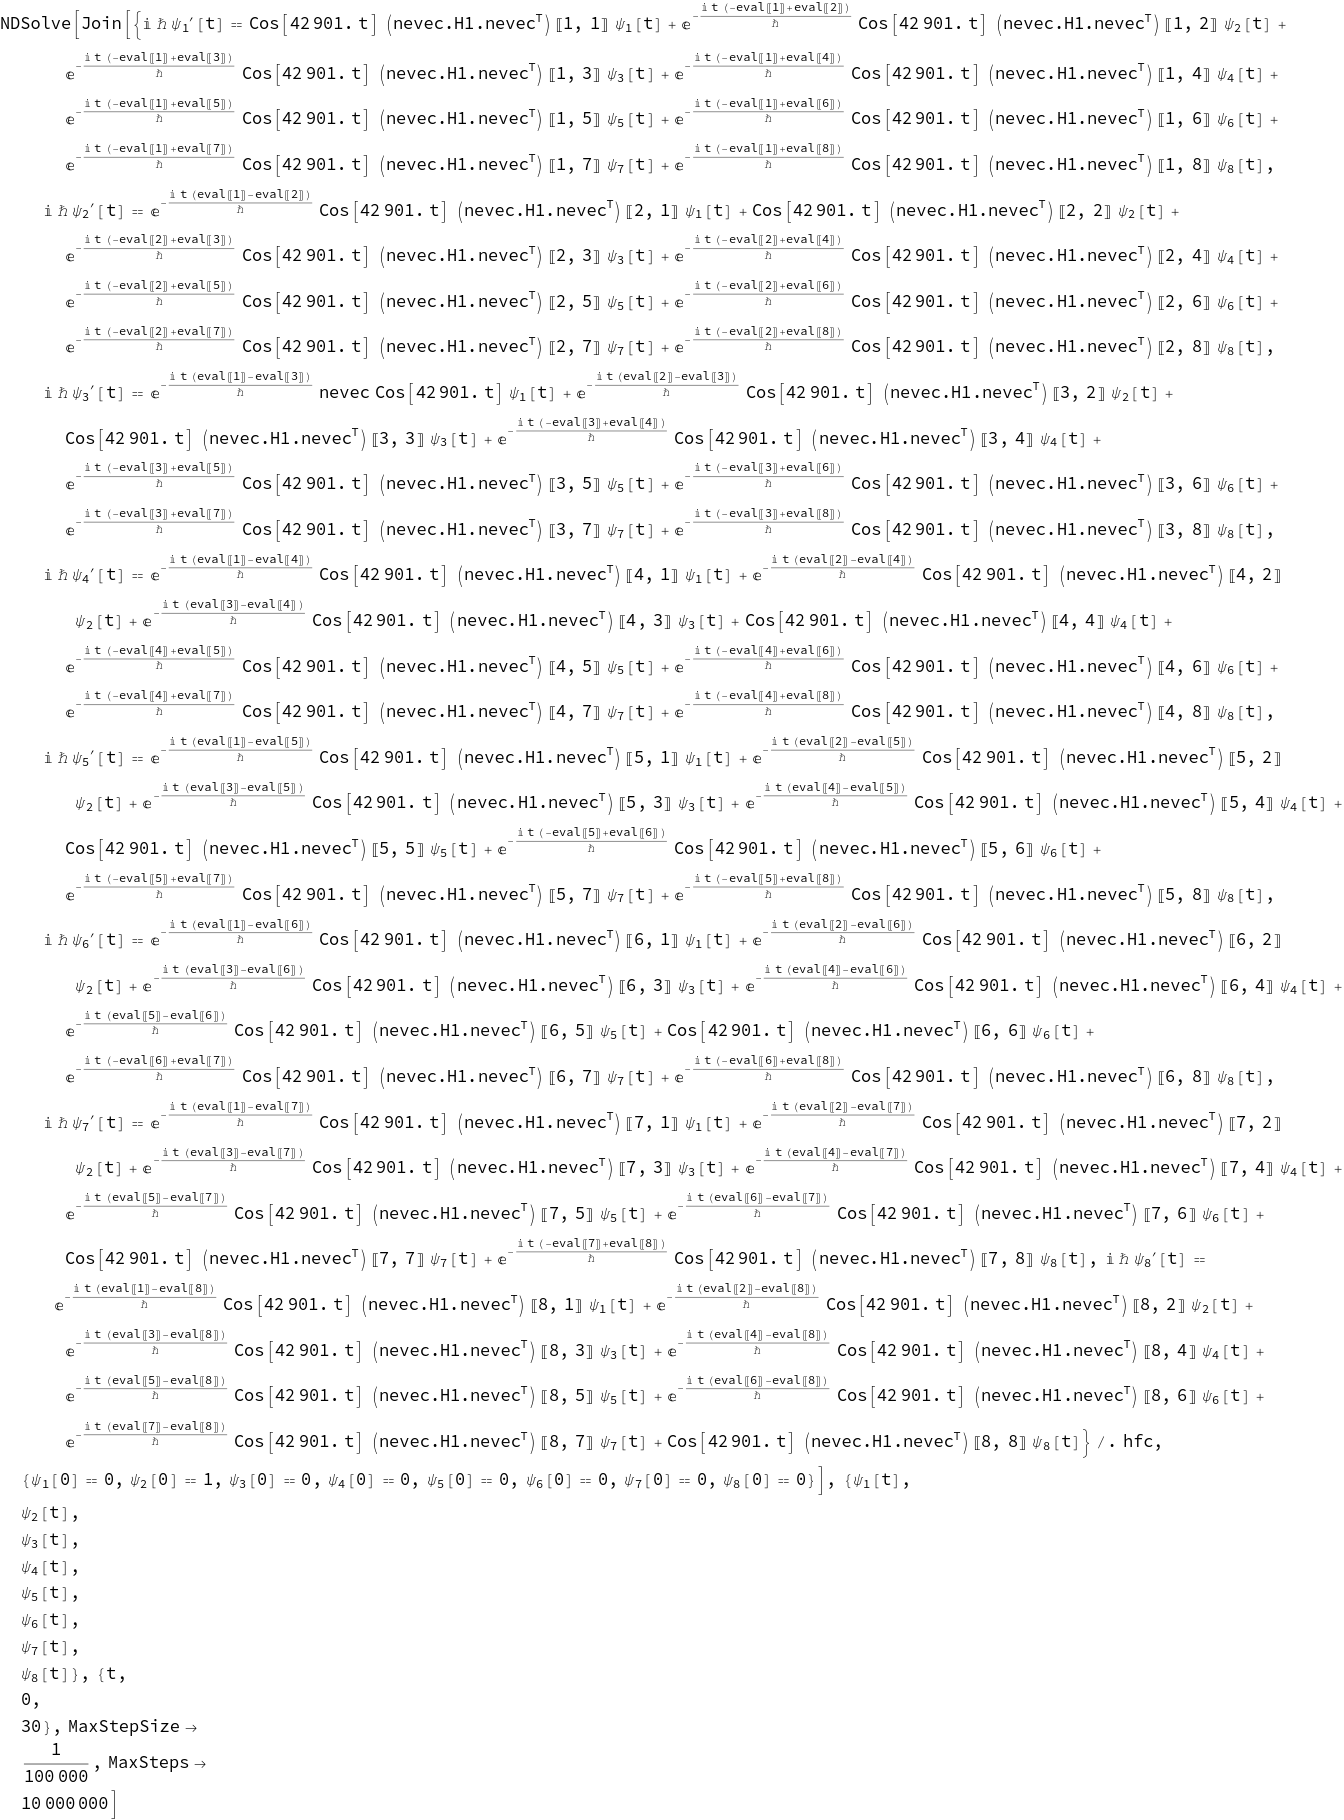

In [3]:
S = NDSolve[Join[deqs /. hfc /. {Bz -> 3.22896, Bacx -> 0.1, Bacy -> 0, Bacz -> 0, ω -> 2*Pi*6827.9}, {Subscript[ψ, 1][0] == 0, Subscript[ψ, 2][0] == 1, Subscript[ψ, 3][0] == 0, Subscript[ψ, 4][0] == 0, Subscript[ψ, 5][0] == 0, Subscript[ψ, 6][0] == 0, Subscript[ψ, 7][0] == 0, Subscript[ψ, 8][0] == 0}], Table[Subscript[ψ, i][t], {i, 8}], {t, 0, 30}, MaxStepSize -> 10^(-5), MaxSteps -> 10^7]

plot:

ReplaceAll::reps:                                                                                     Cos[42901. t] (nevec . H1 . Transpose[nevec])[[1,2]] Ï [t]   Cos[42901. t] (nevec . H1 . Transpose[nevec])[[1,3]] Ï [t]   Cos[42901. t] (nevec . H1 . Transpose[nevec])[[1,4]] Ï [t]   Cos[42901. t] (nevec . H1 . Transpose[nevec])[[1,5]] Ï [t]   Cos[42901. t] (nevec . H1 . Transpose[nevec])[[1,6]] Ï [t]   Cos[42901. t] (nevec . H1 . Transpose[nevec])[[1,7]] Ï [t]   Cos[42901. t] (nevec . H1 . Transpose[nevec])[[1,8]] Ï [t]                  Cos[42901. t] (nevec . H1 . Transpose[nevec])[[2,1]] Ï [t]                                                                Cos[42901. t] (nevec . H1 . Transpose[nevec])[[2,3]] Ï [t]   Cos[42901. t] (nevec . H1 . Transpose[nevec])[[2,4]] Ï [t]   Cos[42901. t] (nevec . H1 . Transpose[nevec])[[2,5]] Ï [t]   Cos[42901. t] (nevec . H1 . Transpose[nevec])[[2,6]] Ï [t]   Cos[42901. t] (nevec . H1 . Transpose[nevec])[[2,7]] Ï [t]   Cos[42901. t] (nevec . H1 . Transpose[nevec])[[2,8]] Ï [t]                     nevec Cos[42901. t] Ï [t]       Cos[42901. t] (nevec . H1 . Transpose[nevec])[[3,2]] Ï [t]                                                                Cos[42901. t] (nevec . H1 . Transpose[nevec])[[3,4]] Ï [t]   Cos[42901. t] (nevec . H1 . Transpose[nevec])[[3,5]] Ï [t]   Cos[42901. t] (nevec . H1 . Transpose[nevec])[[3,6]] Ï [t]   Cos[42901. t] (nevec . H1 . Transpose[nevec])[[3,7]] Ï [t]   Cos[42901. t] (nevec . H1 . Transpose[nevec])[[3,8]] Ï [t]                  Cos[42901. t] (nevec . H1 . Transpose[nevec])[[4,1]] Ï [t]   Cos[42901. t] (nevec . H1 . Transpose[nevec])[[4,2]] Ï [t]   Cos[42901. t] (nevec . H1 . Transpose[nevec])[[4,3]] Ï [t]                                                                Cos[42901. t] (nevec . H1 . Transpose[nevec])[[4,5]] Ï [t]   Cos[42901. t] (nevec . H1 . Transpose[nevec])[[4,6]] Ï [t]   Cos[42901. t] (nevec . H1 . Transpose[nevec])[[4,7]] Ï [t]   Cos[42901. t] (nevec . H1 . Transpose[nevec])[[4,8]] Ï [t]                  Cos[42901. t] (nevec . H1 . Transpose[nevec])[[5,1]] Ï [t]   Cos[42901. t] (nevec . H1 . Transpose[nevec])[[5,2]] Ï [t]   Cos[42901. t] (nevec . H1 . Transpose[nevec])[[5,3]] Ï [t]   Cos[42901. t] (nevec . H1 . Transpose[nevec])[[5,4]] Ï [t]                                                                Cos[42901. t] (nevec . H1 . Transpose[nevec])[[5,6]] Ï [t]   Cos[42901. t] (nevec . H1 . Transpose[nevec])[[5,7]] Ï [t]   Cos[42901. t] (nevec . H1 . Transpose[nevec])[[5,8]] Ï [t]                  Cos[42901. t] (nevec . H1 . Transpose[nevec])[[6,1]] Ï [t]   Cos[42901. t] (nevec . H1 . Transpose[nevec])[[6,2]] Ï [t]   Cos[42901. t] (nevec . H1 . Transpose[nevec])[[6,3]] Ï [t]   Cos[42901. t] (nevec . H1 . Transpose[nevec])[[6,4]] Ï [t]   Cos[42901. t] (nevec . H1 . Transpose[nevec])[[6,5]] Ï [t]                                                                Cos[42901. t] (nevec . H1 . Transpose[nevec])[[6,7]] Ï [t]   Cos[42901. t] (nevec . H1 . Transpose[nevec])[[6,8]] Ï [t]                  Cos[42901. t] (nevec . H1 . Transpose[nevec])[[7,1]] Ï [t]   Cos[42901. t] (nevec . H1 . Transpose[nevec])[[7,2]] Ï [t]   Cos[42901. t] (nevec . H1 . Transpose[nevec])[[7,3]] Ï [t]   Cos[42901. t] (nevec . H1 . Transpose[nevec])[[7,4]] Ï [t]   Cos[42901. t] (nevec . H1 . Transpose[nevec])[[7,5]] Ï [t]   Cos[42901. t] (nevec . H1 . Transpose[nevec])[[7,6]] Ï [t]                                                                Cos[42901. t] (nevec . H1 . Transpose[nevec])[[7,8]] Ï [t]                  Cos[42901. t] (nevec . H1 . Transpose[nevec])[[8,1]] Ï [t]   Cos[42901. t] (nevec . H1 . Transpose[nevec])[[8,2]] Ï [t]   Cos[42901. t] (nevec . H1 . Transpose[nevec])[[8,3]] Ï [t]   Cos[42901. t] (nevec . H1 . Transpose[nevec])[[8,4]] Ï [t]   Cos[42901. t] (nevec . H1 . Transpose[nevec])[[8,5]] Ï [t]   Cos[42901. t] (nevec . H1 . Transpose[nevec])[[8,6]] Ï [t]   Cos[42901. t] (nevec . H1 . Transpose[nevec])[[8,7]] Ï [t]
                                                                                                                                          2                                                            3                                                            4                                                            5                                                            6                                                            7                                                            8                                                                           1                                                                                                                         3                                                            4                                                            5                                                            6                                                            7                                                            8                                             1                                                                2                                                                                                                         4                                                            5                                                            6                                                            7                                                            8                                                                           1                                                            2                                                            3                                                                                                                         5                                                            6                                                            7                                                            8                                                                           1                                                            2                                                            3                                                            4                                                                                                                         6                                                            7                                                            8                                                                           1                                                            2                                                            3                                                            4                                                            5                                                                                                                         7                                                            8                                                                           1                                                            2                                                            3                                                            4                                                            5                                                            6                                                                                                                         8                                                                           1                                                            2                                                            3                                                            4                                                            5                                                            6                                                            7
{Join[{I â (Ï )'[t] == Cos[42901. t] (nevec . H1 . Transpose[nevec])[[1,1]] Ï [t] + ---------------------------------------------------------- + ---------------------------------------------------------- + ---------------------------------------------------------- + ---------------------------------------------------------- + ---------------------------------------------------------- + ---------------------------------------------------------- + ----------------------------------------------------------, I â (Ï )'[t] == ---------------------------------------------------------- + Cos[42901. t] (nevec . H1 . Transpose[nevec])[[2,2]] Ï [t] + ---------------------------------------------------------- + ---------------------------------------------------------- + ---------------------------------------------------------- + ---------------------------------------------------------- + ---------------------------------------------------------- + ----------------------------------------------------------, I â (Ï )'[t] == -------------------------------- + ---------------------------------------------------------- + Cos[42901. t] (nevec . H1 . Transpose[nevec])[[3,3]] Ï [t] + ---------------------------------------------------------- + ---------------------------------------------------------- + ---------------------------------------------------------- + ---------------------------------------------------------- + ----------------------------------------------------------, I â (Ï )'[t] == ---------------------------------------------------------- + ---------------------------------------------------------- + ---------------------------------------------------------- + Cos[42901. t] (nevec . H1 . Transpose[nevec])[[4,4]] Ï [t] + ---------------------------------------------------------- + ---------------------------------------------------------- + ---------------------------------------------------------- + ----------------------------------------------------------, I â (Ï )'[t] == ---------------------------------------------------------- + ---------------------------------------------------------- + ---------------------------------------------------------- + ---------------------------------------------------------- + Cos[42901. t] (nevec . H1 . Transpose[nevec])[[5,5]] Ï [t] + ---------------------------------------------------------- + ---------------------------------------------------------- + ----------------------------------------------------------, I â (Ï )'[t] == ---------------------------------------------------------- + ---------------------------------------------------------- + ---------------------------------------------------------- + ---------------------------------------------------------- + ---------------------------------------------------------- + Cos[42901. t] (nevec . H1 . Transpose[nevec])[[6,6]] Ï [t] + ---------------------------------------------------------- + ----------------------------------------------------------, I â (Ï )'[t] == ---------------------------------------------------------- + ---------------------------------------------------------- + ---------------------------------------------------------- + ---------------------------------------------------------- + ---------------------------------------------------------- + ---------------------------------------------------------- + Cos[42901. t] (nevec . H1 . Transpose[nevec])[[7,7]] Ï [t] + ----------------------------------------------------------, I â (Ï )'[t] == ---------------------------------------------------------- + ---------------------------------------------------------- + ---------------------------------------------------------- + ---------------------------------------------------------- + ---------------------------------------------------------- + ---------------------------------------------------------- + ---------------------------------------------------------- + Cos[42901. t] (nevec . H1 . Transpose[nevec])[[8,8]] Ï [t]} /. hfc, {Ï [0] == 0, Ï [0] == 1, Ï [0] == 0, Ï [0] == 0, Ï [0] == 0, Ï [0] == 0, Ï [0] == 0, Ï [0] == 0}]} is neither a list of replacement rules nor a valid dispatch table, and so cannot be used for replacing.
             1                                                               1                   (I t (-eval[[1]] + eval[[2]]))/â                             (I t (-eval[[1]] + eval[[3]]))/â                             (I t (-eval[[1]] + eval[[4]]))/â                             (I t (-eval[[1]] + eval[[5]]))/â                             (I t (-eval[[1]] + eval[[6]]))/â                             (I t (-eval[[1]] + eval[[7]]))/â                             (I t (-eval[[1]] + eval[[8]]))/â                     2                       (I t (eval[[1]] - eval[[2]]))/â                                                                      2                   (I t (-eval[[2]] + eval[[3]]))/â                             (I t (-eval[[2]] + eval[[4]]))/â                             (I t (-eval[[2]] + eval[[5]]))/â                             (I t (-eval[[2]] + eval[[6]]))/â                             (I t (-eval[[2]] + eval[[7]]))/â                             (I t (-eval[[2]] + eval[[8]]))/â                     3          (I t (eval[[1]] - eval[[3]]))/â                 (I t (eval[[2]] - eval[[3]]))/â                                                                      3                   (I t (-eval[[3]] + eval[[4]]))/â                             (I t (-eval[[3]] + eval[[5]]))/â                             (I t (-eval[[3]] + eval[[6]]))/â                             (I t (-eval[[3]] + eval[[7]]))/â                             (I t (-eval[[3]] + eval[[8]]))/â                     4                       (I t (eval[[1]] - eval[[4]]))/â                              (I t (eval[[2]] - eval[[4]]))/â                              (I t (eval[[3]] - eval[[4]]))/â                                                                      4                   (I t (-eval[[4]] + eval[[5]]))/â                             (I t (-eval[[4]] + eval[[6]]))/â                             (I t (-eval[[4]] + eval[[7]]))/â                             (I t (-eval[[4]] + eval[[8]]))/â                     5                       (I t (eval[[1]] - eval[[5]]))/â                              (I t (eval[[2]] - eval[[5]]))/â                              (I t (eval[[3]] - eval[[5]]))/â                              (I t (eval[[4]] - eval[[5]]))/â                                                                      5                   (I t (-eval[[5]] + eval[[6]]))/â                             (I t (-eval[[5]] + eval[[7]]))/â                             (I t (-eval[[5]] + eval[[8]]))/â                     6                       (I t (eval[[1]] - eval[[6]]))/â                              (I t (eval[[2]] - eval[[6]]))/â                              (I t (eval[[3]] - eval[[6]]))/â                              (I t (eval[[4]] - eval[[6]]))/â                              (I t (eval[[5]] - eval[[6]]))/â                                                                      6                   (I t (-eval[[6]] + eval[[7]]))/â                             (I t (-eval[[6]] + eval[[8]]))/â                     7                       (I t (eval[[1]] - eval[[7]]))/â                              (I t (eval[[2]] - eval[[7]]))/â                              (I t (eval[[3]] - eval[[7]]))/â                              (I t (eval[[4]] - eval[[7]]))/â                              (I t (eval[[5]] - eval[[7]]))/â                              (I t (eval[[6]] - eval[[7]]))/â                                                                      7                   (I t (-eval[[7]] + eval[[8]]))/â                     8                       (I t (eval[[1]] - eval[[8]]))/â                              (I t (eval[[2]] - eval[[8]]))/â                              (I t (eval[[3]] - eval[[8]]))/â                              (I t (eval[[4]] - eval[[8]]))/â                              (I t (eval[[5]] - eval[[8]]))/â                              (I t (eval[[6]] - eval[[8]]))/â                              (I t (eval[[7]] - eval[[8]]))/â                                                                      8               1           2           3           4           5           6           7           8
                                                                                                E                                                            E                                                            E                                                            E                                                            E                                                            E                                                            E                                                                            E                                                                                                                        E                                                            E                                                            E                                                            E                                                            E                                                            E                                                               E                                               E                                                                                                                        E                                                            E                                                            E                                                            E                                                            E                                                                            E                                                            E                                                            E                                                                                                                        E                                                            E                                                            E                                                            E                                                                            E                                                            E                                                            E                                                            E                                                                                                                        E                                                            E                                                            E                                                                            E                                                            E                                                            E                                                            E                                                            E                                                                                                                        E                                                            E                                                                            E                                                            E                                                            E                                                            E                                                            E                                                            E                                                                                                                        E                                                                            E                                                            E                                                            E                                                            E                                                            E                                                            E                                                            E

ReplaceAll::reps: {hfc} is neither a list of replacement rules nor a valid dispatch table, and so cannot be used for replacing.

Join::heads: Heads ReplaceAll and List at positions 1 and 2 are expected to be the same.

ReplaceAll::reps:                                                                                                    0.399872 (nevec . H1 . Transpose[nevec])[[1,2]] Ï [0.000612857]   0.399872 (nevec . H1 . Transpose[nevec])[[1,3]] Ï [0.000612857]   0.399872 (nevec . H1 . Transpose[nevec])[[1,4]] Ï [0.000612857]   0.399872 (nevec . H1 . Transpose[nevec])[[1,5]] Ï [0.000612857]   0.399872 (nevec . H1 . Transpose[nevec])[[1,6]] Ï [0.000612857]   0.399872 (nevec . H1 . Transpose[nevec])[[1,7]] Ï [0.000612857]   0.399872 (nevec . H1 . Transpose[nevec])[[1,8]] Ï [0.000612857]                            0.399872 (nevec . H1 . Transpose[nevec])[[2,1]] Ï [0.000612857]                                                                     0.399872 (nevec . H1 . Transpose[nevec])[[2,3]] Ï [0.000612857]   0.399872 (nevec . H1 . Transpose[nevec])[[2,4]] Ï [0.000612857]   0.399872 (nevec . H1 . Transpose[nevec])[[2,5]] Ï [0.000612857]   0.399872 (nevec . H1 . Transpose[nevec])[[2,6]] Ï [0.000612857]   0.399872 (nevec . H1 . Transpose[nevec])[[2,7]] Ï [0.000612857]   0.399872 (nevec . H1 . Transpose[nevec])[[2,8]] Ï [0.000612857]                                     0.399872 nevec Ï [0.000612857]             0.399872 (nevec . H1 . Transpose[nevec])[[3,2]] Ï [0.000612857]                                                                     0.399872 (nevec . H1 . Transpose[nevec])[[3,4]] Ï [0.000612857]   0.399872 (nevec . H1 . Transpose[nevec])[[3,5]] Ï [0.000612857]   0.399872 (nevec . H1 . Transpose[nevec])[[3,6]] Ï [0.000612857]   0.399872 (nevec . H1 . Transpose[nevec])[[3,7]] Ï [0.000612857]   0.399872 (nevec . H1 . Transpose[nevec])[[3,8]] Ï [0.000612857]                            0.399872 (nevec . H1 . Transpose[nevec])[[4,1]] Ï [0.000612857]   0.399872 (nevec . H1 . Transpose[nevec])[[4,2]] Ï [0.000612857]   0.399872 (nevec . H1 . Transpose[nevec])[[4,3]] Ï [0.000612857]                                                                     0.399872 (nevec . H1 . Transpose[nevec])[[4,5]] Ï [0.000612857]   0.399872 (nevec . H1 . Transpose[nevec])[[4,6]] Ï [0.000612857]   0.399872 (nevec . H1 . Transpose[nevec])[[4,7]] Ï [0.000612857]   0.399872 (nevec . H1 . Transpose[nevec])[[4,8]] Ï [0.000612857]                            0.399872 (nevec . H1 . Transpose[nevec])[[5,1]] Ï [0.000612857]   0.399872 (nevec . H1 . Transpose[nevec])[[5,2]] Ï [0.000612857]   0.399872 (nevec . H1 . Transpose[nevec])[[5,3]] Ï [0.000612857]   0.399872 (nevec . H1 . Transpose[nevec])[[5,4]] Ï [0.000612857]                                                                     0.399872 (nevec . H1 . Transpose[nevec])[[5,6]] Ï [0.000612857]   0.399872 (nevec . H1 . Transpose[nevec])[[5,7]] Ï [0.000612857]   0.399872 (nevec . H1 . Transpose[nevec])[[5,8]] Ï [0.000612857]                            0.399872 (nevec . H1 . Transpose[nevec])[[6,1]] Ï [0.000612857]   0.399872 (nevec . H1 . Transpose[nevec])[[6,2]] Ï [0.000612857]   0.399872 (nevec . H1 . Transpose[nevec])[[6,3]] Ï [0.000612857]   0.399872 (nevec . H1 . Transpose[nevec])[[6,4]] Ï [0.000612857]   0.399872 (nevec . H1 . Transpose[nevec])[[6,5]] Ï [0.000612857]                                                                     0.399872 (nevec . H1 . Transpose[nevec])[[6,7]] Ï [0.000612857]   0.399872 (nevec . H1 . Transpose[nevec])[[6,8]] Ï [0.000612857]                            0.399872 (nevec . H1 . Transpose[nevec])[[7,1]] Ï [0.000612857]   0.399872 (nevec . H1 . Transpose[nevec])[[7,2]] Ï [0.000612857]   0.399872 (nevec . H1 . Transpose[nevec])[[7,3]] Ï [0.000612857]   0.399872 (nevec . H1 . Transpose[nevec])[[7,4]] Ï [0.000612857]   0.399872 (nevec . H1 . Transpose[nevec])[[7,5]] Ï [0.000612857]   0.399872 (nevec . H1 . Transpose[nevec])[[7,6]] Ï [0.000612857]                                                                     0.399872 (nevec . H1 . Transpose[nevec])[[7,8]] Ï [0.000612857]                            0.399872 (nevec . H1 . Transpose[nevec])[[8,1]] Ï [0.000612857]   0.399872 (nevec . H1 . Transpose[nevec])[[8,2]] Ï [0.000612857]   0.399872 (nevec . H1 . Transpose[nevec])[[8,3]] Ï [0.000612857]   0.399872 (nevec . H1 . Transpose[nevec])[[8,4]] Ï [0.000612857]   0.399872 (nevec . H1 . Transpose[nevec])[[8,5]] Ï [0.000612857]   0.399872 (nevec . H1 . Transpose[nevec])[[8,6]] Ï [0.000612857]   0.399872 (nevec . H1 . Transpose[nevec])[[8,7]] Ï [0.000612857]
                                                                                                                                                    2                                                                 3                                                                 4                                                                 5                                                                 6                                                                 7                                                                 8                                                                                          1                                                                                                                                   3                                                                 4                                                                 5                                                                 6                                                                 7                                                                 8                                                                  1                                                                           2                                                                                                                                   4                                                                 5                                                                 6                                                                 7                                                                 8                                                                                          1                                                                 2                                                                 3                                                                                                                                   5                                                                 6                                                                 7                                                                 8                                                                                          1                                                                 2                                                                 3                                                                 4                                                                                                                                   6                                                                 7                                                                 8                                                                                          1                                                                 2                                                                 3                                                                 4                                                                 5                                                                                                                                   7                                                                 8                                                                                          1                                                                 2                                                                 3                                                                 4                                                                 5                                                                 6                                                                                                                                   8                                                                                          1                                                                 2                                                                 3                                                                 4                                                                 5                                                                 6                                                                 7
{Join[{I â (Ï )'[0.000612857] == 0.399872 (nevec . H1 . Transpose[nevec])[[1,1]] Ï [0.000612857] + --------------------------------------------------------------- + --------------------------------------------------------------- + --------------------------------------------------------------- + --------------------------------------------------------------- + --------------------------------------------------------------- + --------------------------------------------------------------- + ---------------------------------------------------------------, I â (Ï )'[0.000612857] == --------------------------------------------------------------- + 0.399872 (nevec . H1 . Transpose[nevec])[[2,2]] Ï [0.000612857] + --------------------------------------------------------------- + --------------------------------------------------------------- + --------------------------------------------------------------- + --------------------------------------------------------------- + --------------------------------------------------------------- + ---------------------------------------------------------------, I â (Ï )'[0.000612857] == ------------------------------------------------- + --------------------------------------------------------------- + 0.399872 (nevec . H1 . Transpose[nevec])[[3,3]] Ï [0.000612857] + --------------------------------------------------------------- + --------------------------------------------------------------- + --------------------------------------------------------------- + --------------------------------------------------------------- + ---------------------------------------------------------------, I â (Ï )'[0.000612857] == --------------------------------------------------------------- + --------------------------------------------------------------- + --------------------------------------------------------------- + 0.399872 (nevec . H1 . Transpose[nevec])[[4,4]] Ï [0.000612857] + --------------------------------------------------------------- + --------------------------------------------------------------- + --------------------------------------------------------------- + ---------------------------------------------------------------, I â (Ï )'[0.000612857] == --------------------------------------------------------------- + --------------------------------------------------------------- + --------------------------------------------------------------- + --------------------------------------------------------------- + 0.399872 (nevec . H1 . Transpose[nevec])[[5,5]] Ï [0.000612857] + --------------------------------------------------------------- + --------------------------------------------------------------- + ---------------------------------------------------------------, I â (Ï )'[0.000612857] == --------------------------------------------------------------- + --------------------------------------------------------------- + --------------------------------------------------------------- + --------------------------------------------------------------- + --------------------------------------------------------------- + 0.399872 (nevec . H1 . Transpose[nevec])[[6,6]] Ï [0.000612857] + --------------------------------------------------------------- + ---------------------------------------------------------------, I â (Ï )'[0.000612857] == --------------------------------------------------------------- + --------------------------------------------------------------- + --------------------------------------------------------------- + --------------------------------------------------------------- + --------------------------------------------------------------- + --------------------------------------------------------------- + 0.399872 (nevec . H1 . Transpose[nevec])[[7,7]] Ï [0.000612857] + ---------------------------------------------------------------, I â (Ï )'[0.000612857] == --------------------------------------------------------------- + --------------------------------------------------------------- + --------------------------------------------------------------- + --------------------------------------------------------------- + --------------------------------------------------------------- + --------------------------------------------------------------- + --------------------------------------------------------------- + 0.399872 (nevec . H1 . Transpose[nevec])[[8,8]] Ï [0.000612857]} /. hfc, {Ï [0] == 0, Ï [0] == 1, Ï [0] == 0, Ï [0] == 0, Ï [0] == 0, Ï [0] == 0, Ï [0] == 0, Ï [0] == 0}]} is neither a list of replacement rules nor a valid dispatch table, and so cannot be used for replacing.
             1                                                                    1                       ((0. + 0.000612857 I) (-eval[[1]] + eval[[2]]))/â                 ((0. + 0.000612857 I) (-eval[[1]] + eval[[3]]))/â                 ((0. + 0.000612857 I) (-eval[[1]] + eval[[4]]))/â                 ((0. + 0.000612857 I) (-eval[[1]] + eval[[5]]))/â                 ((0. + 0.000612857 I) (-eval[[1]] + eval[[6]]))/â                 ((0. + 0.000612857 I) (-eval[[1]] + eval[[7]]))/â                 ((0. + 0.000612857 I) (-eval[[1]] + eval[[8]]))/â               2                           ((0. + 0.000612857 I) (eval[[1]] - eval[[2]]))/â                                                           2                       ((0. + 0.000612857 I) (-eval[[2]] + eval[[3]]))/â                 ((0. + 0.000612857 I) (-eval[[2]] + eval[[4]]))/â                 ((0. + 0.000612857 I) (-eval[[2]] + eval[[5]]))/â                 ((0. + 0.000612857 I) (-eval[[2]] + eval[[6]]))/â                 ((0. + 0.000612857 I) (-eval[[2]] + eval[[7]]))/â                 ((0. + 0.000612857 I) (-eval[[2]] + eval[[8]]))/â               3                    ((0. + 0.000612857 I) (eval[[1]] - eval[[3]]))/â           ((0. + 0.000612857 I) (eval[[2]] - eval[[3]]))/â                                                           3                       ((0. + 0.000612857 I) (-eval[[3]] + eval[[4]]))/â                 ((0. + 0.000612857 I) (-eval[[3]] + eval[[5]]))/â                 ((0. + 0.000612857 I) (-eval[[3]] + eval[[6]]))/â                 ((0. + 0.000612857 I) (-eval[[3]] + eval[[7]]))/â                 ((0. + 0.000612857 I) (-eval[[3]] + eval[[8]]))/â               4                           ((0. + 0.000612857 I) (eval[[1]] - eval[[4]]))/â                  ((0. + 0.000612857 I) (eval[[2]] - eval[[4]]))/â                  ((0. + 0.000612857 I) (eval[[3]] - eval[[4]]))/â                                                           4                       ((0. + 0.000612857 I) (-eval[[4]] + eval[[5]]))/â                 ((0. + 0.000612857 I) (-eval[[4]] + eval[[6]]))/â                 ((0. + 0.000612857 I) (-eval[[4]] + eval[[7]]))/â                 ((0. + 0.000612857 I) (-eval[[4]] + eval[[8]]))/â               5                           ((0. + 0.000612857 I) (eval[[1]] - eval[[5]]))/â                  ((0. + 0.000612857 I) (eval[[2]] - eval[[5]]))/â                  ((0. + 0.000612857 I) (eval[[3]] - eval[[5]]))/â                  ((0. + 0.000612857 I) (eval[[4]] - eval[[5]]))/â                                                           5                       ((0. + 0.000612857 I) (-eval[[5]] + eval[[6]]))/â                 ((0. + 0.000612857 I) (-eval[[5]] + eval[[7]]))/â                 ((0. + 0.000612857 I) (-eval[[5]] + eval[[8]]))/â               6                           ((0. + 0.000612857 I) (eval[[1]] - eval[[6]]))/â                  ((0. + 0.000612857 I) (eval[[2]] - eval[[6]]))/â                  ((0. + 0.000612857 I) (eval[[3]] - eval[[6]]))/â                  ((0. + 0.000612857 I) (eval[[4]] - eval[[6]]))/â                  ((0. + 0.000612857 I) (eval[[5]] - eval[[6]]))/â                                                           6                       ((0. + 0.000612857 I) (-eval[[6]] + eval[[7]]))/â                 ((0. + 0.000612857 I) (-eval[[6]] + eval[[8]]))/â               7                           ((0. + 0.000612857 I) (eval[[1]] - eval[[7]]))/â                  ((0. + 0.000612857 I) (eval[[2]] - eval[[7]]))/â                  ((0. + 0.000612857 I) (eval[[3]] - eval[[7]]))/â                  ((0. + 0.000612857 I) (eval[[4]] - eval[[7]]))/â                  ((0. + 0.000612857 I) (eval[[5]] - eval[[7]]))/â                  ((0. + 0.000612857 I) (eval[[6]] - eval[[7]]))/â                                                           7                       ((0. + 0.000612857 I) (-eval[[7]] + eval[[8]]))/â               8                           ((0. + 0.000612857 I) (eval[[1]] - eval[[8]]))/â                  ((0. + 0.000612857 I) (eval[[2]] - eval[[8]]))/â                  ((0. + 0.000612857 I) (eval[[3]] - eval[[8]]))/â                  ((0. + 0.000612857 I) (eval[[4]] - eval[[8]]))/â                  ((0. + 0.000612857 I) (eval[[5]] - eval[[8]]))/â                  ((0. + 0.000612857 I) (eval[[6]] - eval[[8]]))/â                  ((0. + 0.000612857 I) (eval[[7]] - eval[[8]]))/â                                                           8                         1           2           3           4           5           6           7           8
                                                                                                         E                                                                 E                                                                 E                                                                 E                                                                 E                                                                 E                                                                 E                                                                                           E                                                                                                                                  E                                                                 E                                                                 E                                                                 E                                                                 E                                                                 E                                                                                    E                                                          E                                                                                                                                  E                                                                 E                                                                 E                                                                 E                                                                 E                                                                                           E                                                                 E                                                                 E                                                                                                                                  E                                                                 E                                                                 E                                                                 E                                                                                           E                                                                 E                                                                 E                                                                 E                                                                                                                                  E                                                                 E                                                                 E                                                                                           E                                                                 E                                                                 E                                                                 E                                                                 E                                                                                                                                  E                                                                 E                                                                                           E                                                                 E                                                                 E                                                                 E                                                                 E                                                                 E                                                                                                                                  E                                                                                           E                                                                 E                                                                 E                                                                 E                                                                 E                                                                 E                                                                 E

General::stop: Further output of ReplaceAll::reps will be suppressed during this calculation.

Join::heads: Heads ReplaceAll and List at positions 1 and 2 are expected to be the same.

Join::heads: Heads ReplaceAll and List at positions 1 and 2 are expected to be the same.

General::stop: Further output of Join::heads will be suppressed during this calculation.

-Graphics-
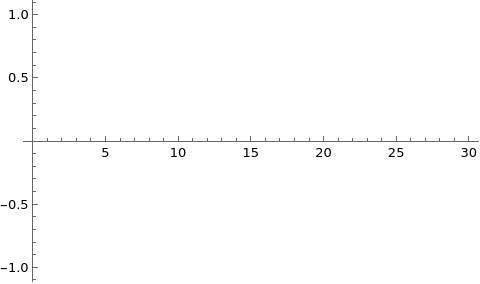

In [4]:
Plot[Evaluate[Abs[Subscript[ψ, 2][t] /. S[[1]]]^2], {t, 0, 30}]

In [ ]:
Plot[Evaluate[Abs[Subscript[ψ, 7][t] /. S[[1]]]^2], {t, 0, 30}]

### rotating-wave approximation

detuning:

In [5]:
Δ = ω - (Ei - Ej)/ℏ; 

generalized Rabi frequency:

In [6]:
Ω = Sqrt[(Tij*Tji)/ℏ^2 + Δ^2]; 

solutions:

In [7]:
ψi[t_] = (ψi0*Cos[Ω*(t/2)] + I*((Δ/Ω)*ψi0 - (Tij/(ℏ*Ω))*ψj0)*Sin[Ω*(t/2)])/E^(I*Δ*(t/2)); 
ψj[t_] = E^(I*Δ*(t/2))*(ψj0*Cos[Ω*(t/2)] - I*((Δ/Ω)*ψj0 + (Tji/(ℏ*Ω))*ψi0)*Sin[Ω*(t/2)]); 

check that these satisfy the time-dependent Schrödinger equation in the rotating-wave approximation:

In [9]:
FullSimplify[I*ℏ*Derivative[1][ψi][t] == ((1/2)*ψj[t]*Tij)/E^(I*Δ*t)]

True

In [10]:
FullSimplify[I*ℏ*Derivative[1][ψj][t] == (1/2)*ψi[t]*E^(I*Δ*t)*Tji]

True

check the boundary conditions:

In [11]:
ψi[0]

ψi0

In [12]:
ψj[0]

ψj0

This Mathematica code is part of the lecture script  *Introduction to Computational Quantum Mechanics*  by Roman Schmied. It is licensed under a  [Creative Commons Attribution-ShareAlike 4.0 International License](http://creativecommons.org/licenses/by-sa/4.0/) .



You can download the associated lecture script at  [http://arxiv.org/abs/1403.7050](http://arxiv.org/abs/1403.7050) 

# transverse Ising model

### quantum-mechanical spin and angular momentum operators

In [13]:
SpinQ[S_] := IntegerQ[2*S] && S >= 0
splus[0] = SparseArray[{{0}}]; 
splus[(S_)?SpinQ] := splus[S] = SparseArray[Band[{1, 2}] -> Table[Sqrt[S*(S + 1) - M*(M + 1)], {M, S - 1, -S, -1}], {2*S + 1, 2*S + 1}]
sminus[(S_)?SpinQ] := Transpose[splus[S]]
sx[(S_)?SpinQ] := sx[S] = (splus[S] + sminus[S])/2
sy[(S_)?SpinQ] := sy[S] = (splus[S] - sminus[S])/(2*I)
sz[(S_)?SpinQ] := sz[S] = SparseArray[Band[{1, 1}] -> Range[S, -S, -1], {2*S + 1, 2*S + 1}]
id[(S_)?SpinQ] := id[S] = IdentityMatrix[2*S + 1, SparseArray]

### operators acting on many spins

an operator  $a$ 



 acting on spin  $k$ 



 out of a set of  $n$ 



 spins- $S$ 



:

In [21]:
op[(S_)?SpinQ, n_Integer, k_Integer, (a_)?MatrixQ] /; 1 <= k <= n && Dimensions[a] == {2*S + 1, 2*S + 1} := KroneckerProduct[IdentityMatrix[(2*S + 1)^(k - 1), SparseArray], a, IdentityMatrix[(2*S + 1)^(n - k), SparseArray]]

spin operators acting on spin  $k$ 



 out of a set of  $n$ 



 spins- $S$ 



:

In [22]:
sx[(S_)?SpinQ, n_Integer, k_Integer] /; 1 <= k <= n := op[S, n, k, sx[S]]
sy[(S_)?SpinQ, n_Integer, k_Integer] /; 1 <= k <= n := op[S, n, k, sy[S]]
sz[(S_)?SpinQ, n_Integer, k_Integer] /; 1 <= k <= n := op[S, n, k, sz[S]]

### Hamiltonian

transverse Ising model on a ring of  $N$ 



 spins:

 $$\hat{H}=-\frac{b}{2}\sum _{k=1}^N \hat{S}_x^{(k)}-\sum _{k=1}^{N-1} \hat{S}_z^{(k)}\hat{S}_z^{(k+1)}$$ 



In [25]:
H[(S_)?SpinQ, n_Integer /; n >= 3, b_] := (-(b/2))*Sum[sx[S, n, k], {k, n}] - Sum[sz[S, n, k] . sz[S, n, Mod[k + 1, n, 1]], {k, n}]

### asymptotic ground states

product state  $|\theta \rangle ^{\otimes N}$ 



:

In [26]:
productstate[(θ_)?VectorQ, 1] = θ; 
productstate[(θ_)?VectorQ, n_Integer /; n >= 2] := Flatten[KroneckerProduct @@ Table[θ, n]]

parallel-spin states:

In [28]:
xup[(S_)?SpinQ] := Table[Sqrt[Binomial[2*S, M + S]], {M, S, -S, -1}]/2^S
xdn[(S_)?SpinQ] := Table[(-1)^(M + S)*Sqrt[Binomial[2*S, M + S]], {M, S, -S, -1}]/2^S
zup[(S_)?SpinQ] := SparseArray[1 -> 1, 2*S + 1]
zdn[(S_)?SpinQ] := SparseArray[-1 -> 1, 2*S + 1]

product states:

In [32]:
allxup[(S_)?SpinQ, n_Integer /; n >= 1] := productstate[xup[S], n]
allxdn[(S_)?SpinQ, n_Integer /; n >= 1] := productstate[xdn[S], n]
allzup[(S_)?SpinQ, n_Integer /; n >= 1] := productstate[zup[S], n]
allzdn[(S_)?SpinQ, n_Integer /; n >= 1] := productstate[zdn[S], n]

### Hamiltonian diagonalization

In [ ]:
With[{S = 1/2, n = 14}, h[b_] = H[S, n, b]; gs0up = allzup[S, n]; gs0dn = allzdn[S, n]; gsplusinf = allxup[S, n]; gsminusinf = allxdn[S, n]; Clear[gs]; gs[(b_)?NumericQ, m_Integer /; m >= 1] := gs[b, m] = Transpose[Sort[Transpose[-Eigensystem[-h[N[b]], m, Method -> {"Arnoldi", "Criteria" -> "RealPart", MaxIterations -> 10^6}]]]]; Clear[mx, my, mz]; mx[(b_)?NumericQ, m_Integer /; m >= 1, k_Integer] := mx[b, m, k] = With[{g = gs[b, m][[2,1]]}, Re[Conjugate[g] . (sx[S, n, Mod[k, n, 1]] . g)]]; my[(b_)?NumericQ, m_Integer /; m >= 1, k_Integer] := my[b, m, k] = With[{g = gs[b, m][[2,1]]}, Re[Conjugate[g] . (sy[S, n, Mod[k, n, 1]] . g)]]; mz[(b_)?NumericQ, m_Integer /; m >= 1, k_Integer] := mz[b, m, k] = With[{g = gs[b, m][[2,1]]}, Re[Conjugate[g] . (sz[S, n, Mod[k, n, 1]] . g)]]; Clear[Cop]; Cop[k1_Integer, k2_Integer] := Cop[k1, k2] = With[{q1 = Mod[k1, n, 1], q2 = Mod[k2, n, 1]}, sx[S, n, q1] . sx[S, n, q2] + sy[S, n, q1] . sy[S, n, q2] + sz[S, n, q1] . sz[S, n, q2]]; Clear[c]; c[(b_)?NumericQ, m_Integer /; m >= 1, {k1_Integer, k2_Integer}] := c[b, m, {k1, k2}] = With[{g = gs[b, m][[2,1]]}, Re[Conjugate[g] . (Cop[k1, k2] . g)] - (mx[b, m, k1]*mx[b, m, k2] + my[b, m, k1]*my[b, m, k2] + mz[b, m, k1]*mz[b, m, k2])]; ]

: 

### analysis of the ground state

#### energy gap

In [ ]:
With[{bmax = 3, db = 1/8, m = 2}, ListLinePlot[Table[{b, gs[b, m][[1,2]] - gs[b, m][[1,1]]}, {b, -bmax, bmax, db}]]]

Eigensystem::arm: Method -> Arnoldi can only be used for matrices of machine- or arbitrary-precision real numbers.

Part::partw: Part 2 of Transpose[-Eigensystem[SparseArray[<245760>, {16384, 16384}], 2, Method -> {Arnoldi, Criteria -> RealPart, MaxIterations -> 1000000}]] does not exist.

Eigensystem::arm: Method -> Arnoldi can only be used for matrices of machine- or arbitrary-precision real numbers.

Part::partw: Part 2 of Transpose[-Eigensystem[SparseArray[<245760>, {16384, 16384}], 2, Method -> {Arnoldi, Criteria -> RealPart, MaxIterations -> 1000000}]] does not exist.

Eigensystem::arm: Method -> Arnoldi can only be used for matrices of machine- or arbitrary-precision real numbers.

General::stop: Further output of Eigensystem::arm will be suppressed during this calculation.

Part::partw: Part 2 of Transpose[-Eigensystem[SparseArray[<245760>, {16384, 16384}], 2, Method -> {Arnoldi, Criteria -> RealPart, MaxIterations -> 1000000}]] does not exist.

General::stop: Further output of Part::partw will be suppressed during this calculation.

#### overlap with asymptotic wavefunctions

In [ ]:
With[{bmax = 3, db = 1/8, m = 2}, ListLinePlot[Transpose[Table[{{b, Abs[gsminusinf . gs[b, m][[2,1]]]^2}, {b, Abs[gsplusinf . gs[b, m][[2,1]]]^2}, {b, Abs[((gs0up - gs0dn)/Sqrt[2]) . gs[b, m][[2,1]]]^2}, {b, Abs[((gs0up + gs0dn)/Sqrt[2]) . gs[b, m][[2,1]]]^2}, {b, Abs[((gs0up - gs0dn)/Sqrt[2]) . gs[b, m][[2,1]]]^2 + Abs[((gs0up + gs0dn)/Sqrt[2]) . gs[b, m][[2,1]]]^2}}, {b, -bmax, bmax, db}]]]]

#### magnetization

In [ ]:
With[{bmax = 3, db = 1/8, m = 2}, ListLinePlot[Transpose[Table[{{b, mx[b, m, 1]}, {b, mz[b, m, 1]}}, {b, -bmax, bmax, db}]]]]

#### correlations

In [ ]:
With[{bmax = 3, db = 1/8, m = 2}, ListLinePlot[Table[{b, c[b, m, {1, 1 + δ}]}, {δ, 1, 7}, {b, -bmax, bmax, db}], PlotLegends -> Range[7]]]

#### reduced density matrices

functions for calculating reduced density matrices: (see ReducedDensityMatrix.nb)

In [ ]:
rdm[(ψABC_)?VectorQ, {dA_Integer /; dA >= 1, dB_Integer /; dB >= 1, dC_Integer /; dC >= 1}] /; Length[ψABC] == dA*dB*dC := With[{P = ArrayReshape[ψABC, {dA, dB, dC}]}, Flatten[Transpose[P, {1, 3, 2}] . ConjugateTranspose[P], {{1, 2}, {3, 4}}]]
traceout[(ψ_)?VectorQ, d_Integer /; d >= 1] /; Divisible[Length[ψ], d] := rdm[ψ, {1, d, Length[ψ]/d}]
traceout[(ψ_)?VectorQ, d_Integer /; d <= -1] /; Divisible[Length[ψ], -d] := rdm[ψ, {Length[ψ]/(-d), -d, 1}]

#### entropy of entanglement

In [ ]:
s[0 | 0.] = 0; 
s[x_] = (-x)*Log[2, x]; 

In [ ]:
EE[(S_)?SpinQ, ψ_] := Total[s /@ Re[Eigenvalues[traceout[ψ, -(Length[ψ]/(2*S + 1))]]]]

In [ ]:
With[{bmax = 3, db = 1/8, m = 2}, ListLinePlot[Table[{b, EE[1/2, gs[b, m][[2,1]]]}, {b, -bmax, bmax, db}], PlotRange -> {0, 1}]]

This Mathematica code is part of the lecture script  *Introduction to Computational Quantum Mechanics*  by Roman Schmied. It is licensed under a  [Creative Commons Attribution-ShareAlike 4.0 International License](http://creativecommons.org/licenses/by-sa/4.0/) .



You can download the associated lecture script at  [http://arxiv.org/abs/1403.7050](http://arxiv.org/abs/1403.7050) 

# Quantum Gates and Quantum Computing

### definitions of quantum gates

single-qubit pseudospin operators:  $\mathbf{1}$ 



,  $\hat{\sigma }_x$ 



,  $\hat{\sigma }_y$ 



,  $\hat{\sigma }_z$ 





In [1]:
{id, σx, σy, σz} = Table[SparseArray[PauliMatrix[i]], {i, 0, 3}]; 

projectors onto 0 and 1 states, respectively:

In [2]:
P0 = SparseArray[(id + σz)/2]; 
P1 = SparseArray[(id - σz)/2]; 

operator  $\hat{a}$ 



 acting on the  $k^{\text{th}}$ 



 qubit of a set of  $n$ 



 qubits:  $\mathbf{1}\otimes \mathbf{1}\otimes \cdots \otimes \mathbf{1}\otimes \hat{a}\otimes 1\otimes \cdots \otimes \mathbf{1}\otimes \mathbf{1}$ 





In [4]:
op[n_Integer, k_Integer, a_] /; 1 <= k <= n && Dimensions[a] == {2, 2} := KroneckerProduct[IdentityMatrix[2^(k - 1), SparseArray], a, IdentityMatrix[2^(n - k), SparseArray]]

controlled operator: in a set of  $n$ 



 qubits, only if all of the qubits in the list  $\lambda$ 



 are in state 1 then the operator  $\hat{A}$ 



 is applied to the system; otherwise no operation is applied

In [5]:
CTRL[n_Integer, λ_ /; VectorQ[λ, IntegerQ], A_] /; Unequal @@ λ && Min[λ] >= 1 && Max[λ] <= n && Dimensions[A] == {2^n, 2^n} := IdentityMatrix[2^n, SparseArray] + Dot @@ (op[n, #1, P1] & ) /@ λ . (A - IdentityMatrix[2^n, SparseArray])

#### single-qubit gates

Pauli gates acting on the  $k^{\text{th}}$ 



 qubit of a set of  $n$ 



 qubits:

In [6]:
X[n_Integer, k_Integer] /; 1 <= k <= n := op[n, k, σx]
Y[n_Integer, k_Integer] /; 1 <= k <= n := op[n, k, σy]
Z[n_Integer, k_Integer] /; 1 <= k <= n := op[n, k, σz]

Pauli rotations:  $\hat{R}_x(\phi )\propto e^{-i \phi  \left.\hat{\sigma }_x\right/2}$ 



 etc.

In [9]:
RX[n_Integer, k_Integer, ϕ_] /; 1 <= k <= n := op[n, k, ((1 + E^(I*ϕ))/2)*id + ((1 - E^(I*ϕ))/2)*σx]
RY[n_Integer, k_Integer, ϕ_] /; 1 <= k <= n := op[n, k, ((1 + E^(I*ϕ))/2)*id + ((1 - E^(I*ϕ))/2)*σy]
RZ[n_Integer, k_Integer, ϕ_] /; 1 <= k <= n := op[n, k, ((1 + E^(I*ϕ))/2)*id + ((1 - E^(I*ϕ))/2)*σz]

Hadamard gate:

In [12]:
H[n_Integer, k_Integer] /; 1 <= k <= n := op[n, k, (σx + σz)/Sqrt[2]]

#### two-qubit gates

SWAP gate: exchanges the state of qubits  $j$ 



 and  $k$ 



 in a set of  $n$ 



 qubits

In [13]:
SWAP[n_Integer, {j_Integer, k_Integer}] /; 1 <= j <= n && 1 <= k <= n && j != k := (IdentityMatrix[2^n, SparseArray] + X[n, j] . X[n, k] + Y[n, j] . Y[n, k] + Z[n, j] . Z[n, k])/2

square root of the SWAP gate:

In [14]:
SQRTSWAP[n_Integer, {j_Integer, k_Integer}] /; 1 <= j <= n && 1 <= k <= n && j != k := ((3 + I)/4)*IdentityMatrix[2^n, SparseArray] + ((1 - I)/4)*(X[n, j] . X[n, k] + Y[n, j] . Y[n, k] + Z[n, j] . Z[n, k])

CNOT gate: in a set of  $n$ 



 qubits, if qubit  $j$ 



 is in state 0 then there is no effect on qubit  $k$ 



, whereas if qubit  $j$ 



 is in state 1 then the NOT operator  $\hat{\sigma }_x$ 



 acts on qubit  $k$ 





In [15]:
CNOT[n_Integer, j_Integer -> k_Integer] /; 1 <= j <= n && 1 <= k <= n && j != k := CTRL[n, {j}, op[n, k, σx]]

#### three-qubit gates

CCNOT (Toffoli) gate: in a set of  $n$ 



 qubits, if both qubits  $i$ 



 and  $j$ 



 are in state 1, then the NOT operator  $\hat{\sigma }_x$ 



 acts on qubit  $k$ 





In [16]:
CCNOT[n_Integer, {i_Integer, j_Integer} -> k_Integer] /; 1 <= i <= n && 1 <= j <= n && 1 <= k <= n && i != j != k := CTRL[n, {i, j}, op[n, k, σx]]

controlled SWAP (Fredkin) gate: in a set of  $n$ 



 qubits, if qubit  $i$ 



 is in state 0 then there is no effect on qubits  $j$ 



 and  $k$ 



, whereas if qubit  $i$ 



 is in state 1 then the state of qubits  $j$ 



 and  $k$ 



 is exchanged

In [17]:
CSWAP[n_Integer, i_Integer -> {j_Integer, k_Integer}] /; 1 <= i <= n && 1 <= j <= n && 1 <= k <= n && i != j != k := CTRL[n, {i}, SWAP[n, {j, k}]]

### a simple circuit

the operator for the circuit:

1           1                1           1             1             1
{{-------, 0, -------, 0}, {0, -------, 0, -------}, {0, -------, 0, -(-------)}, 
  Sqrt[2]     Sqrt[2]          Sqrt[2]     Sqrt[2]       Sqrt[2]       Sqrt[2]
 
        1             1
>   {-------, 0, -(-------), 0}}
     Sqrt[2]       Sqrt[2]
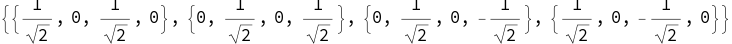

In [19]:
S = CNOT[2, 1 -> 2] . H[2, 1]; 
Normal[S]

the basis set:

In [21]:
B[n_Integer /; n >= 1] := Tuples[{0, 1}, n]
B[2]

{{0, 0}, {0, 1}, {1, 0}, {1, 1}}

operate on the  $|00\rangle$ 



 input state:

1              1
{-------, 0, 0, -------}
 Sqrt[2]        Sqrt[2]
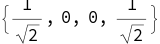

In [23]:
ψin = {1, 0, 0, 0}; 
ψout = S . ψin

### Quantum Fourier Transform

The Quantum Fourier Transform (QFT) is assembled following Fig. 5.1 of M. Nielsen and I. Chuang,  *Quantum Computation and Quantum Information* , Cambridge University Press, 2010 (tenth anniversary edition).

The quantum circuit for a QFT is assembled from blocks that connect the  $i^{\text{th}}$ 



 qubit to the qubits  $\{i+1,i+2,\ldots ,n\}$ 



 via controlled phase gates:

In [24]:
QFTblock[n_Integer, i_Integer] /; 1 <= i <= n := Dot @@ Table[CTRL[n, {j}, RZ[n, i, 2*(Pi/2^(j + 1 - i))]], {j, n, i + 1, -1}] . H[n, i]

assemble the quantum Fourier transformation by connecting all qubits:

1. connect all qubits through the above QFTblock operation

2. swap the order of the qubits

In [25]:
QFT[n_Integer] /; n >= 1 := Dot @@ Table[SWAP[n, {i, n + 1 - i}], {i, 1, n/2}] . Dot @@ Table[QFTblock[n, i], {i, n, 1, -1}]

QFT consists of a polynomial number of gates:

·  $n$ 



 Hadamard gates

·  $\frac{n(n-1)}{2}$ 



 controlled rotations

·  $\left\lfloor \frac{n}{2}\right\rfloor$ 



 swap gates

simple formula for the resulting matrix representation:

{True, True, True, SparseArray[<256>, {16, 16}] == 
 
       1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
>    {{-, -, -, -, -, -, -, -, -, -, -, -, -, -, -, -}, 
       4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4
 
              1/8      1/4      3/8         5/8      3/4      7/8
       1  (-1)     (-1)     (-1)     I  (-1)     (-1)     (-1)       1     1      1/8
>     {-, -------, -------, -------, -, -------, -------, -------, -(-), -(-) (-1)   , 
       4     4        4        4     4     4        4        4       4     4
 
         1      1/4    1      3/8    1       1      5/8    1      3/4    1      7/8
>      -(-) (-1)   , -(-) (-1)   , -(-) I, -(-) (-1)   , -(-) (-1)   , -(-) (-1)   }, 
         4             4             4       4             4             4
 
              1/4         3/4                                                   1/4
       1  (-1)     I  (-1)       1     1      1/4    1       1      3/4  1  (-1)     I
>     {-, -------, -, -------, -(-), -(-) (-1)   , -(-) I, -(-) (-1)   , -, -------, -, 
       4     4     4     4       4     4             4       4           4     4     4
 
           3/4
       (-1)       1     1      1/4    1       1      3/4
>      -------, -(-), -(-) (-1)   , -(-) I, -(-) (-1)   }, 
          4       4     4             4       4
 
              3/8      3/4                                          1/4      5/8
       1  (-1)     (-1)       1      1/8    1       1      7/8  (-1)     (-1)       1
>     {-, -------, -------, -(-) (-1)   , -(-) I, -(-) (-1)   , -------, -------, -(-), 
       4     4        4       4             4       4              4        4       4
 
                                       1/8         7/8
         1      3/8    1      3/4  (-1)     I  (-1)       1      1/4    1      5/8
>      -(-) (-1)   , -(-) (-1)   , -------, -, -------, -(-) (-1)   , -(-) (-1)   }, 
         4             4              4     4     4       4             4
 
       1  I    1     1     1  I    1     1     1  I    1     1     1  I    1     1
>     {-, -, -(-), -(-) I, -, -, -(-), -(-) I, -, -, -(-), -(-) I, -, -, -(-), -(-) I}, 
       4  4    4     4     4  4    4     4     4  4    4     4     4  4    4     4
 
              5/8                                                                 3/8
       1  (-1)       1      1/4    1      7/8  I    1      1/8    1      3/4  (-1)
>     {-, -------, -(-) (-1)   , -(-) (-1)   , -, -(-) (-1)   , -(-) (-1)   , -------, 
       4     4       4             4           4    4             4              4
 
                               1/4      7/8              1/8      3/4
         1     1      5/8  (-1)     (-1)       1     (-1)     (-1)       1      3/8
>      -(-), -(-) (-1)   , -------, -------, -(-) I, -------, -------, -(-) (-1)   }, 
         4     4              4        4       4        4        4       4
 
              3/4              1/4                                              3/4
       1  (-1)       1     (-1)       1     1      3/4  I    1      1/4  1  (-1)
>     {-, -------, -(-) I, -------, -(-), -(-) (-1)   , -, -(-) (-1)   , -, -------, 
       4     4       4        4       4     4           4    4           4     4
 
                   1/4
         1     (-1)       1     1      3/4  I    1      1/4
>      -(-) I, -------, -(-), -(-) (-1)   , -, -(-) (-1)   }, 
         4        4       4     4           4    4
 
              7/8                    5/8              3/8                    1/8
       1  (-1)       1      3/4  (-1)       1     (-1)       1      1/4  (-1)       1
>     {-, -------, -(-) (-1)   , -------, -(-) I, -------, -(-) (-1)   , -------, -(-), 
       4     4       4              4       4        4       4              4       4
 
                         3/4                                     1/4
         1      7/8  (-1)       1      5/8  I    1      3/8  (-1)       1      1/8
>      -(-) (-1)   , -------, -(-) (-1)   , -, -(-) (-1)   , -------, -(-) (-1)   }, 
     
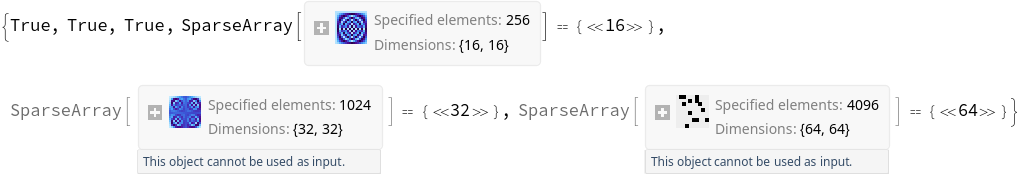

In [26]:
FullSimplify[Table[QFT[n] == (1/2^(n/2))*Table[E^(2*Pi*I*j*(k/2^n)), {j, 0, 2^n - 1}, {k, 0, 2^n - 1}], {n, 6}]]

### Quantum phase estimation

estimate the phase of this:

In [27]:
u = {1}; 
U[ϕ_] = {{E^(2*Pi*I*ϕ)}}; 

check that we set up the problem correctly:

In [29]:
{U[ϕ] . u === E^(2*Pi*I*ϕ)*u, Norm[u] == 1}

{True, True}

unit operator in the space of the system  $U$ 



:

In [30]:
U0 = IdentityMatrix[Length[u], SparseArray]; 

 $U$ 



 operator attached to  $n$ 



 qubits, controlled by the  $i^{\text{th}}$ 



 qubit:

In [31]:
CTRLU[n_Integer, i_Integer, ϕ_] /; 1 <= i <= n := KroneckerProduct[op[n, i, P0], U0] + KroneckerProduct[op[n, i, P1], U[ϕ]]

estimate to  $t$ 



 digits of precision:

In [32]:
t = 4; 
ϵ[ϕ_] = Normal[KroneckerProduct[ConjugateTranspose[QFT[t]], U0] . Dot @@ Table[CTRLU[t, i, 2^(t - i)*ϕ], {i, t, 1, -1}] . KroneckerProduct[Dot @@ Table[H[t, i], {i, t}], U0] . Flatten[KroneckerProduct[SparseArray[1 -> 1, 2^t], u]]]; 

probabilities for measuring the different basis states: trace out the SUT and look at the diagonal elements of the reduced density matrix

(see ReducedDensityMatrix.nb)

In [34]:
rdm[(ψABC_)?VectorQ, {dA_Integer /; dA >= 1, dB_Integer /; dB >= 1, dC_Integer /; dC >= 1}] /; Length[ψABC] == dA*dB*dC := With[{P = ArrayReshape[ψABC, {dA, dB, dC}]}, Flatten[Transpose[P, {1, 3, 2}] . ConjugateTranspose[P], {{1, 2}, {3, 4}}]]
traceout[(ψ_)?VectorQ, d_Integer /; d >= 1] /; Divisible[Length[ψ], d] := rdm[ψ, {1, d, Length[ψ]/d}]
traceout[(ψ_)?VectorQ, d_Integer /; d <= -1] /; Divisible[Length[ψ], -d] := rdm[ψ, {Length[ψ]/(-d), -d, 1}]

In [37]:
prob[(ϕ_)?NumericQ] := Re[Diagonal[traceout[ϵ[N[ϕ]], -Length[u]]]]

When  $\phi$ 



 is an integer multiple of  $2^{-t}$ 



, only one basis state has 100% probability of occurring. The  $i^{\text{th}}$ 



 basis state corresponds to a measurement of  $\phi =\frac{i-1}{2^t}$ 



:

1.   0    0    0    0    0    0    0    0    0    0    0    0    0    0    0

0    1.   0    0    0    0    0    0    0    0    0    0    0    0    0    0

0    0    1.   0    0    0    0    0    0    0    0    0    0    0    0    0

0    0    0    1.   0    0    0    0    0    0    0    0    0    0    0    0

0    0    0    0    1.   0    0    0    0    0    0    0    0    0    0    0

0    0    0    0    0    1.   0    0    0    0    0    0    0    0    0    0

0    0    0    0    0    0    1.   0    0    0    0    0    0    0    0    0

0    0    0    0    0    0    0    1.   0    0    0    0    0    0    0    0

0    0    0    0    0    0    0    0    1.   0    0    0    0    0    0    0

0    0    0    0    0    0    0    0    0    1.   0    0    0    0    0    0

0    0    0    0    0    0    0    0    0    0    1.   0    0    0    0    0

0    0    0    0    0    0    0    0    0    0    0    1.   0    0    0    0

0    0    0    0    0    0    0    0    0    0    0    0    1.   0    0    0

0    0    0    0    0    0    0    0    0    0    0    0    0    1.   0    0

0    0    0    0    0    0    0    0    0    0    0    0    0    0    1.   0

0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    1.

1.   0    0    0    0    0    0    0    0    0    0    0    0    0    0    0
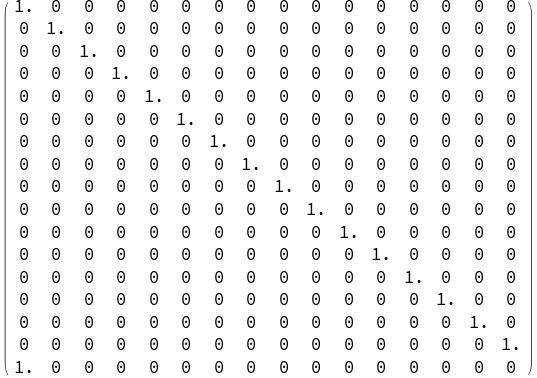

In [38]:
MatrixForm[Chop[Table[prob[ϕ], {ϕ, 0, 1, 2^(-t)}]]]

When  $\phi$ 



 is not an integer multiple of  $2^{-t}$ 



, all basis states can occur in measurement:

In [39]:
Round[prob[0.2], 0.001]

{0.004, 0.008, 0.025, 0.876, 0.055, 0.011, 0.005, 0.003, 0.002, 0.002, 0.001, 0.001, 
 
>   0.001, 0.002, 0.002, 0.003}

The mean measurement is a bad estimator (doesn’t converge as  $t\to \infty$ 



).

The most likely measurement is a good estimator.

Legended[-Graphics-, Placed[LineLegend[{Directive[Opacity[1.], CapForm[Butt], 
 
>       AbsoluteThickness[1.6], GrayLevel[0]], 
 
>      Directive[Opacity[1.], CapForm[Butt], AbsoluteThickness[1.6], Thickness[Large], 
 
>       RGBColor[0, 0, 1]], Directive[Opacity[1.], CapForm[Butt], 
 
>       AbsoluteThickness[1.6], Thickness[Large], RGBColor[1, 0, 0]]}, 
 
>     {exact, mean of measurements, most frequent measurement}, LegendMarkers -> None, 
 
>     LabelStyle -> Directive[16, GrayLevel[0], Bold], LegendLayout -> Column], After, 
 
>    Identity]]
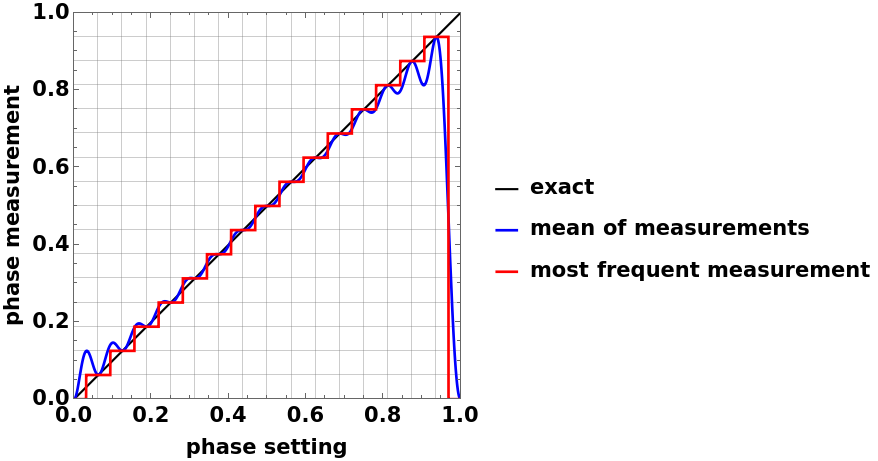

In [42]:
mean[(ϕ_)?NumericQ] := prob[ϕ] . (Range[0, 2^t - 1]/2^t); 
mostprobable[(ϕ_)?NumericQ] := (Ordering[prob[ϕ], -1][[1]] - 1)/2^t; 
Plot[{ϕ, mean[ϕ], mostprobable[ϕ]}, {ϕ, 0, 1}, FrameLabel -> {"phase setting", "phase measurement"}, LabelStyle -> Directive[16, Black, Bold], PlotRange -> {{0, 1}, {0, 1}}, PlotRangePadding -> None, PlotStyle -> {Black, {Thick, Blue}, {Thick, Red}}, AspectRatio -> Automatic, PlotTheme -> "Scientific", PlotLegends -> {"exact", "mean of measurements", "most frequent measurement"}, GridLines -> {Range[1, 2^t - 1]/2^t, Range[1, 2^t - 1]/2^t}]

This Mathematica code is part of the lecture script  *Introduction to Computational Quantum Mechanics*  by Roman Schmied. It is licensed under a  [Creative Commons Attribution-ShareAlike 4.0 International License](http://creativecommons.org/licenses/by-sa/4.0/) .



You can download the associated lecture script at  [http://arxiv.org/abs/1403.7050](http://arxiv.org/abs/1403.7050) 

# particle in a 1D gravity well

### units

we use natural units for simplicity:

In [43]:
m = ℏ = g = 1; 

Other unit systems can be defined here.

### analytic calculation

Hamiltonian:

 $$\hat{H}=-\frac{\hbar ^2}{2m}\frac{d^2}{dx^2}+m g \hat{x}$$ 



exact energy eigenstates and energies:

In [44]:
ψ[k_, x_] = ((2*m^2*g)/ℏ^2)^(1/6)*(AiryAi[AiryAiZero[k] + x*((2*m^2*g)/ℏ^2)^(1/3)]/Derivative[1][AiryAi][AiryAiZero[k]]); 
ϵ[k_] = (-AiryAiZero[k])*((m*g^2*ℏ^2)/2)^(1/3); 

show lowest energy eigenstates:

-Graphics-
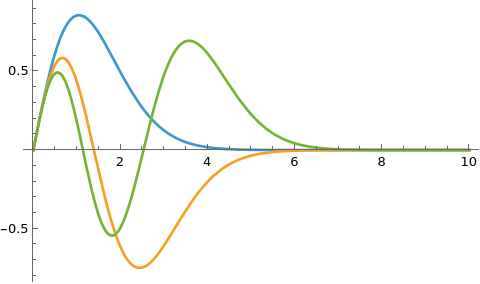

In [46]:
Plot[Evaluate[Table[ψ[k, x], {k, 3}]], {x, 0, 10}]

### system setup

basis set size:

In [47]:
nmax = 12; 

computational box size:

In [48]:
a = 10; 

### basis set

momentum-basis functions:

In [49]:
ϕ[n_, x_] = Sqrt[2/a]*Sin[(n*Pi*x)/a]; 

### numerical solution (I): momentum basis

kinetic-energy operator  $\hat{T}$ 



:

In [50]:
TM = SparseArray[Band[{1, 1}] -> Range[nmax]^2*((Pi^2*ℏ^2)/(2*m*a^2))]; 

position operator  $\hat{x}$ 



:

In [51]:
xM = SparseArray[{Band[{1, 1}] -> a/2, {n1_, n2_} /; OddQ[n1 - n2] -> -((8*a*n1*n2)/((n1^2 - n2^2)^2*Pi^2))}, {nmax, nmax}]; 

potential-energy operator:

In [52]:
VM = m*g*xM; 

Hamiltonian in the momentum representation:

In [53]:
HM = TM + VM; 

ground state:

In [54]:
gsM = -Eigensystem[-N[HM], 1, Method -> {"Arnoldi", "Criteria" -> "RealPart", MaxIterations -> 10^6}]; 

ground-state energy, compared to analytic result:

In [55]:
{gsM[[1,1]], N[ϵ[1]]}

{1.85608, 1.85576}

numerical ground-state wavefunction:

In [56]:
ψ0[x_] = gsM[[2,1]] . Table[ϕ[n, x], {n, nmax}]; 

overlap with the exact ground state:

In [57]:
Abs[NIntegrate[ψ0[x]*ψ[1, x], {x, 0, a}]]^2

0.999965

### numerical solution (II): mixed basis

computational grid:

In [58]:
Δ = a/(nmax + 1); 
xgrid = Range[nmax]*Δ; 

convert the kinetic-energy operator into the position basis:

In [60]:
TM = SparseArray[Band[{1, 1}] -> Range[nmax]^2*((Pi^2*ℏ^2)/(2*m*a^2))]; 
TP = FourierDST[TM, 1]; 

potential-energy operator: gravity well  $W(x)=m g x$ 





In [62]:
W[x_] = m*g*x; 
Wgrid = W /@ xgrid; 
VP = SparseArray[Band[{1, 1}] -> Wgrid]; 

Hamiltonian in the position representation:

In [65]:
HP = TP + VP; 

ground state:

In [66]:
gsP = -Eigensystem[-N[HP], 1, Method -> {"Arnoldi", "Criteria" -> "RealPart", MaxIterations -> 10^6}]; 

ground-state energy, compared to analytic result:

In [67]:
{gsP[[1,1]], N[ϵ[1]]}

{1.86372, 1.85576}

ground-state wavefunction as linear interpolation between grid points:

-Graphics-
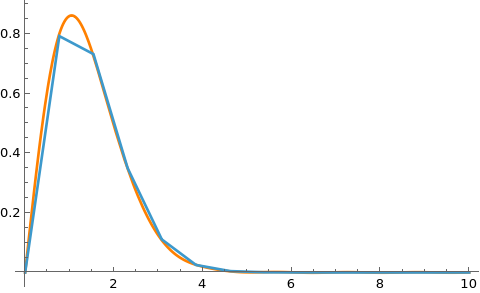

In [71]:
γ = Join[{{0, 0}}, Transpose[{xgrid, gsP[[2,1]]/Sqrt[Δ]}], {{a, 0}}]; 
P1 = ListLinePlot[γ]; 
P2 = Plot[ψ0[x], {x, 0, a}, PlotStyle -> Orange]; 
Show[P2, P1]

#### Wigner distribution

calculate the  $k$ 



-dependent Wigner distribution of a pure state with coefficient vector  $\overset{\rightharpoonup }{v}$ 



 on the spatial grid

return a function of one parameter  $\kappa =k a$ 





-  $a$ 



 is the size of the grid

-  $n$ 



 is the number of grid points (the length of the vector  $\overset{\rightharpoonup }{v}$ 



)

-  $\Delta =\frac{a}{n+1}$ 



 is the grid spacing

-  $v_j=\langle j|\psi \rangle$ 



 is the projection of the pure state onto the  $j^{\text{th}}$ 



 spatial basis function

In [72]:
WignerDistribution[(v_)?VectorQ] := With[{nmax = Length[v]}, Function[κ, Evaluate[(Sinc[κ/(nmax + 1)]/Pi)*Table[ComplexExpand[Re[Sum[v[[j - m]]*Conjugate[v[[j + m]]]*Exp[(2*I*κ*m)/(nmax + 1)], {m, -Min[j - 1, nmax - j], Min[j - 1, nmax - j]}]]], {j, 0, nmax + 1}]]]]

plot the Wigner function of a pure state with coefficient vector  $Y=\overset{\rightharpoonup }{v}$ 



 or density matrix  $Y=R$ 



:

(needs the grid coordinates,  $x\in \left[x_{\min },x_{\max }\right]$ 



, for labeling the axes;  $a=x_{\max }-x_{\min }$ 



)

color scale is  $\left[-,+\right]$ 



 with  $-$ 



=blue,  $0$ 



=white,  $+\frac{1}{\pi }$ 



=red

In [73]:
WignerDistributionPlot[(v_)?VectorQ, {(xmin_)?NumericQ, (xmax_)?NumericQ} /; xmax > xmin] := Module[{nmax, qmax, w, W}, nmax = Length[v]; w = WignerDistribution[v]; qmax = Floor[nmax/2]; W = Table[w[q*Pi], {q, -qmax, qmax}]; ArrayPlot[W, FrameTicks -> Automatic, DataRange -> {{xmin, xmax}, ((qmax*Pi)/(xmax - xmin))*{-1, 1}}, PlotRange -> {{xmin, xmax}, ((qmax*Pi)/(xmax - xmin))*{-1, 1}}, AspectRatio -> 1/GoldenRatio, ColorFunctionScaling -> False, ColorFunction -> (Blend[{Blue, White, Red}, (Pi*#1 + 1)/2] & )]]

plot the Wigner distribution of the ground state:

-Graphics-
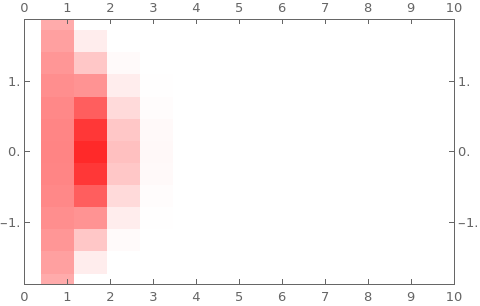

In [74]:
WignerDistributionPlot[gsP[[2,1]], {0, a}]

This Mathematica code is part of the lecture script  *Introduction to Computational Quantum Mechanics*  by Roman Schmied. It is licensed under a  [Creative Commons Attribution-ShareAlike 4.0 International License](http://creativecommons.org/licenses/by-sa/4.0/) .



You can download the associated lecture script at  [http://arxiv.org/abs/1403.7050](http://arxiv.org/abs/1403.7050) 

# Wigner quasi-probability distribution

The Wigner quasi-probability distribution of a density operator  $\hat{\rho }$ 



 is

 $$W(x,k)=\frac{1}{\pi }\int _{-\infty }^{\infty }dy\left\langle x-y\left| \hat{\rho }\right| x+y\right\rangle e^{2i k y}$$ 



### definitions

calculate the  $k$ 



-dependent Wigner distribution of a pure state with coefficient vector  $\overset{\rightharpoonup }{v}$ 



 on the spatial grid

return a function of one parameter  $\kappa =k a$ 





-  $a$ 



 is the size of the grid

-  $n$ 



 is the number of grid points (the length of the vector  $\overset{\rightharpoonup }{v}$ 



)

-  $\Delta =\frac{a}{n+1}$ 



 is the grid spacing

-  $v_j=\langle j|\psi \rangle$ 



 is the projection of the pure state onto the  $j^{\text{th}}$ 



 spatial basis function

In [75]:
WignerDistribution[(v_)?VectorQ] := With[{nmax = Length[v]}, Function[κ, Evaluate[(Sinc[κ/(nmax + 1)]/Pi)*Table[ComplexExpand[Re[Sum[v[[j - m]]*Conjugate[v[[j + m]]]*Exp[(2*I*κ*m)/(nmax + 1)], {m, -Min[j - 1, nmax - j], Min[j - 1, nmax - j]}]]], {j, 0, nmax + 1}]]]]

same for a mixed state with coefficient matrix  $R$ 



:

In [76]:
WignerDistribution[R_ /; MatrixQ[R, NumericQ] && Length[R] == Length[Transpose[R]]] := With[{nmax = Length[R]}, Function[κ, Evaluate[(Sinc[κ/(nmax + 1)]/Pi)*Table[ComplexExpand[Re[Sum[R[[j - m,j + m]]*Exp[(2*I*κ*m)/(nmax + 1)], {m, -Min[j - 1, nmax - j], Min[j - 1, nmax - j]}]]], {j, 0, nmax + 1}]]]]

### plotting

plot the Wigner function of a pure state with coefficient vector  $Y=\overset{\rightharpoonup }{v}$ 



 or density matrix  $Y=R$ 



:

(needs the grid coordinates,  $x\in \left[x_{\min },x_{\max }\right]$ 



, for labeling the axes;  $a=x_{\max }-x_{\min }$ 



)

color scale is  $\left[-,+\right]$ 



 with  $-$ 



=blue,  $0$ 



=white,  $+\frac{1}{\pi }$ 



=red

In [77]:
WignerDistributionPlot[Y_ /; VectorQ[Y, NumericQ] || (MatrixQ[Y, NumericQ] && Length[Y] == Length[Transpose[Y]]), {(xmin_)?NumericQ, (xmax_)?NumericQ} /; xmax > xmin] := Module[{nmax, qmax, w, W}, nmax = Length[Y]; w = WignerDistribution[Y]; qmax = Floor[nmax/2]; W = Table[w[q*Pi], {q, -qmax, qmax}]; ArrayPlot[W, FrameTicks -> Automatic, DataRange -> {{xmin, xmax}, ((qmax*Pi)/(xmax - xmin))*{-1, 1}}, PlotRange -> {{xmin, xmax}, ((qmax*Pi)/(xmax - xmin))*{-1, 1}}, AspectRatio -> 1/GoldenRatio, ColorFunctionScaling -> False, ColorFunction -> (Blend[{Blue, White, Red}, (Pi*#1 + 1)/2] & )]]

This Mathematica code is part of the lecture script  *Introduction to Computational Quantum Mechanics*  by Roman Schmied. It is licensed under a  [Creative Commons Attribution-ShareAlike 4.0 International License](http://creativecommons.org/licenses/by-sa/4.0/) .



You can download the associated lecture script at  [http://arxiv.org/abs/1403.7050](http://arxiv.org/abs/1403.7050) 

# dynamics of a particle moving in a 1D potential: split-step method

### units

we use natural units for simplicity:

In [78]:
m = ℏ = g = 1; 

Other unit systems can be defined here.

### system setup

basis set size:

In [79]:
nmax = 1000; 

computational grid:

In [80]:
a = 30; 
Δ = a/(nmax + 1); 
xgrid = Range[nmax]*Δ; 

potential: gravity well with potential  $W(x)=m g x$ 





In [83]:
W[x_] = m*g*x; 
Wgrid = W /@ xgrid; 

### exact propagation

propagation in the position-basis representation:

In [85]:
VP = SparseArray[Band[{1, 1}] -> Wgrid]; 
TP = FourierDST[SparseArray[Band[{1, 1}] -> Range[nmax]^2*((Pi^2*ℏ^2)/(2*m*a^2))], 1]; 
HP = TP + VP; 
propExact[(Δt_)?NumericQ, v0_ /; VectorQ[v0, NumericQ]] := MatrixExp[(-I)*HP*N[Δt/ℏ]] . v0

### split-step propagation

In [89]:
propApprox[(Δt_)?NumericQ, M_Integer /; M >= 1, v0_ /; VectorQ[v0, NumericQ]] := Module[{λ, Ke, Pe2, propKin, propPot2, prop}, λ = (-I)*N[Δt/(M*ℏ)]; Ke = Exp[λ*Range[nmax]^2*((Pi^2*ℏ^2)/(2*m*a^2))]; propKin[v_] := FourierDST[Ke*FourierDST[v, 1], 1]; Pe2 = Exp[(λ/2)*Wgrid]; propPot2[v_] := Pe2*v; prop[v_] := propPot2[propKin[propPot2[v]]]; Transpose[{(Range[0, M]/M)*Δt, NestList[prop, v0, M]}]]

#### initial wavefunction

starting point: Gaussian localized around the initial position  $x_0$ 



 in the simulation box

mean gridue:  $\left\langle \hat{x}\right\rangle =x_0$ 





standard deviation:  $\left\langle \hat{x}^2\right\rangle -\left\langle \hat{x}\right\rangle ^2=\sigma ^2$ 





-Graphics-
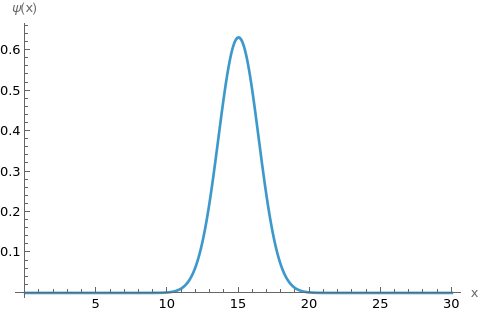

In [94]:
x0 = 15; 
σ = 1; 
t1 = Sqrt[2*(x0/g)]; 
vv = Normalize[N[E^(-((xgrid - x0)/(2*σ))^2)]]; 
ListLinePlot[Join[{{0, 0}}, Transpose[{xgrid, vv/Sqrt[Δ]}], {{a, 0}}], PlotRange -> All, AxesLabel -> {"x", "ψ(x)"}]

#### time-dependent density

propagate in time and show time-dependent density:

-Graphics-
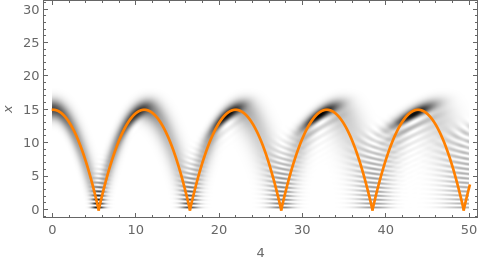

In [95]:
With[{Δt = 50, M = 1000}, ρ = ArrayPad[Abs[propApprox[Δt, M, vv][[All,2]]]^2/Δ, {{0, 0}, {1, 1}}]; Pq = ArrayPlot[Reverse[Transpose[ρ]], DataRange -> {{0, Δt}, {0, a}}]; Pc = Plot[x0 - (1/2)*Mod[t, 2*t1, -t1]^2, {t, 0, Δt}, PlotStyle -> Orange]; Show[Pq, Pc, AspectRatio -> 1/2, FrameLabel -> {t, x}, FrameTicks -> Automatic]]

plot the time-dependent average position:

-Graphics-
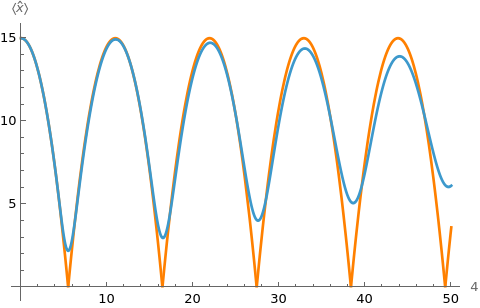

In [96]:
With[{Δt = 50, M = 1000}, Mq = ListLinePlot[({#1[[1]], Abs[#1[[2]]]^2 . xgrid} & ) /@ propApprox[Δt, M, vv], PlotRange -> All]; Mc = Plot[x0 - (1/2)*Mod[t, 2*t1, -t1]^2, {t, 0, Δt}, PlotStyle -> Orange, PlotRange -> All]; Show[Mc, Mq, AxesLabel -> {t, 〈 OverHat[x] 〉}]]

### split-step propagation with a time-dependent potential

propagate with a time-dependent potential given as a function  $W(x,t)$ 



:

In [97]:
propApprox[Wt_, (Δt_)?NumericQ, M_Integer /; M >= 1, v0_ /; VectorQ[v0, NumericQ]] := Module[{λ, Ke, propKin, propPot2, prop}, λ = (-I)*N[Δt/(M*ℏ)]; Ke = Exp[λ*Range[nmax]^2*((Pi^2*ℏ^2)/(2*m*a^2))]; propKin[v_] := FourierDST[Ke*FourierDST[v, 1], 1]; propPot2[t_, v_] := Exp[(λ/2)*(Wt[#1, t] & ) /@ xgrid]*v; prop[v_, t_] := propPot2[t + (3*Δt)/(4*M), propKin[propPot2[t + Δt/(4*M), v]]]; Transpose[{(Range[0, M]/M)*Δt, FoldList[prop, v0, (Range[0, M - 1]/M)*Δt]}]]

propagate in time and show time-dependent density:

resonant driving:  $W(x,t)=W(x)(1+A \sin (\omega  t))$ 



, picking a resonant  $\omega =\pi \left/t_1\right.$ 



 to amplify the bouncing motion

-Graphics-
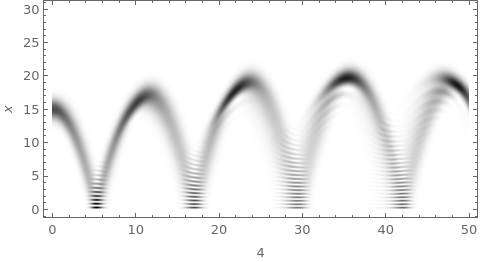

In [98]:
With[{A = 0.1, ω = Pi/t1, Δt = 50, M = 1000}, Wt[x_, t_] = W[x]*(1 + A*Sin[ω*t]); ρ = ArrayPad[Abs[propApprox[Wt, Δt, M, vv][[All,2]]]^2/Δ, {{0, 0}, {1, 1}}]; Pq = ArrayPlot[Reverse[Transpose[ρ]], DataRange -> {{0, Δt}, {0, a}}]; Show[Pq, AspectRatio -> 1/2, FrameLabel -> {t, x}, FrameTicks -> Automatic]]

### split-step propagation with a time-dependent potential and with nonlinear interaction

propagate with a time-dependent potential given as a function  $W(x,t)+\kappa | \psi (x,t)| ^2$ 



:

In [99]:
propApprox[Wt_, (κ_)?NumericQ, (Δt_)?NumericQ, M_Integer /; M >= 1, v0_ /; VectorQ[v0, NumericQ]] := Module[{λ, Ke, propKin, propPot2, prop}, λ = (-I)*N[Δt/(M*ℏ)]; Ke = Exp[λ*Range[nmax]^2*((Pi^2*ℏ^2)/(2*m*a^2))]; propKin[v_] := FourierDST[Ke*FourierDST[v, 1], 1]; propPot2[t_, v_] := Exp[(λ/2)*((Wt[#1, t] & ) /@ xgrid + κ*(Abs[v]^2/Δ))]*v; prop[v_, t_] := propPot2[t + (3*Δt)/(4*M), propKin[propPot2[t + Δt/(4*M), v]]]; Transpose[{(Range[0, M]/M)*Δt, FoldList[prop, v0, (Range[0, M - 1]/M)*Δt]}]]

propagate in time and show time-dependent density:

[here using time-independent potential  $W(x,t)=W(x)$ 



]

-Graphics-
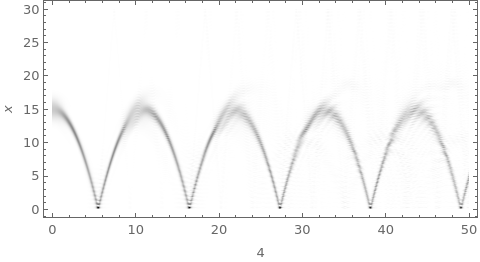

In [100]:
With[{κ = -3*((g*ℏ^4)/m)^(1/3), Δt = 50, M = 1000}, ρ = ArrayPad[Abs[propApprox[W[#1] & , κ, Δt, M, vv][[All,2]]]^2/Δ, {{0, 0}, {1, 1}}]; Pq = ArrayPlot[Reverse[Transpose[ρ]], DataRange -> {{0, Δt}, {0, a}}]; Show[Pq, AspectRatio -> 1/2, FrameLabel -> {t, x}, FrameTicks -> Automatic]]

-Graphics-
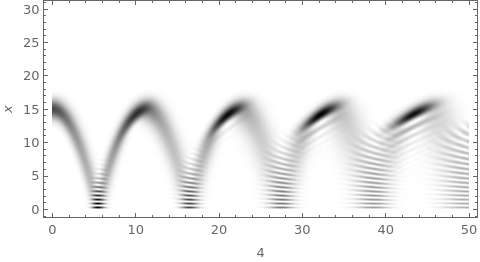

In [101]:
With[{κ = 0*((g*ℏ^4)/m)^(1/3), Δt = 50, M = 1000}, ρ = ArrayPad[Abs[propApprox[W[#1] & , κ, Δt, M, vv][[All,2]]]^2/Δ, {{0, 0}, {1, 1}}]; Pq = ArrayPlot[Reverse[Transpose[ρ]], DataRange -> {{0, Δt}, {0, a}}]; Show[Pq, AspectRatio -> 1/2, FrameLabel -> {t, x}, FrameTicks -> Automatic]]

-Graphics-
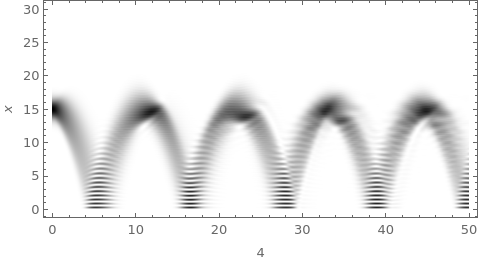

In [102]:
With[{κ = 3*((g*ℏ^4)/m)^(1/3), Δt = 50, M = 1000}, ρ = ArrayPad[Abs[propApprox[W[#1] & , κ, Δt, M, vv][[All,2]]]^2/Δ, {{0, 0}, {1, 1}}]; Pq = ArrayPlot[Reverse[Transpose[ρ]], DataRange -> {{0, Δt}, {0, a}}]; Show[Pq, AspectRatio -> 1/2, FrameLabel -> {t, x}, FrameTicks -> Automatic]]